The objective of this project is to investigate statewide Common Core mathematics and English/language arts examination scores for students in the third grade from various schools throughout New York City (hereafter referred to as NYC), and to establish correlations between these scores and such attributes as school safety ratings, quality review ratings, class size, and attendance. The analysis will focus on the year 2014 (school year 2013 - 2014). It will be determined whether there are stronger correlations between these attributes and one type of exam or the other, i.e. whether an attribute has a stronger correlation with the mathematics exam score than with the English/language arts exam score.

The necessary libraries are imported:

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

The Data

For this project, a total of seven datasets from the NYC Open Data site, located at https://opendata.cityofnewyork.us/, will be used. Each data set will be introduced, read in, and cleaned individually. The primary datasets are those describing the Mathematics and ELA examinations. Eventually, these and all of our other datasets will be joined on the 'DBN' variable; this is the unique identifier for each school and follows the pattern district number + borough letter + school number.

The dataset 2013 - 2015 New York State Mathematics Exam by School (https://data.cityofnewyork.us/Education/2013-2015-New-York-State-Mathematics-Exam-by-Schoo/gcvr-n8qw) lists statewide mathematics exam scores for students in grades 3 - 8 from various NYC schools.

In [2]:
math_exam_2013_2015 = pd.read_csv(r'C:\Users\desid\OneDrive\Documents\Analytics Portfolio\Python\2013_-_2015_New_York_State_Math_Exam.csv')
math_exam_2013_2015.head()

,DBN,School Name,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
0,01M015,P.S. 015 ROBERTO CLEMENTE,3,2013,All Students,27,278.0,16.0,59.3,11.0,40.7,0.0,0.0,0.0,0.0,0.0,0.0
1,01M015,P.S. 015 ROBERTO CLEMENTE,3,2014,All Students,18,286.0,6.0,33.3,9.0,50.0,2.0,11.1,1.0,5.6,3.0,16.7
2,01M015,P.S. 015 ROBERTO CLEMENTE,3,2015,All Students,17,280.0,10.0,58.8,4.0,23.5,2.0,11.8,1.0,5.9,3.0,17.6
3,01M015,P.S. 015 ROBERTO CLEMENTE,4,2013,All Students,20,277.0,12.0,60.0,6.0,30.0,1.0,5.0,1.0,5.0,2.0,10.0
4,01M015,P.S. 015 ROBERTO CLEMENTE,4,2014,All Students,24,282.0,9.0,37.5,14.0,58.3,1.0,4.2,0.0,0.0,1.0,4.2


In [3]:
math_exam_2013_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161403 entries, 0 to 161402
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DBN               161403 non-null  object 
 1   School Name       161403 non-null  object 
 2   Grade             161403 non-null  object 
 3   Year              161403 non-null  int64  
 4   Category          161403 non-null  object 
 5   Number Tested     161403 non-null  int64  
 6   Mean Scale Score  135720 non-null  float64
 7   # Level 1         135720 non-null  float64
 8   % Level 1         135720 non-null  float64
 9   # Level 2         135720 non-null  float64
 10  % Level 2         135720 non-null  float64
 11  # Level 3         135720 non-null  float64
 12  % Level 3         135720 non-null  float64
 13  # Level 4         135720 non-null  float64
 14  % Level 4         135720 non-null  float64
 15  # Level 3+4       135720 non-null  float64
 16  % Level 3+4       13

The dataset 2013 - 2015 New York State English Language Arts (ELA) Exam by School (https://data.cityofnewyork.us/Education/2013-2015-New-York-State-English-Language-Arts-ELA/jk35-yh5p) lists statewide ELA scores for students in grades 3 - 8 from various NYC schools.

In [4]:
ela_exam_2013_2015 = pd.read_csv(r'C:\Users\desid\OneDrive\Documents\Analytics Portfolio\Python\2013_-_2015_New_York_State_ELA_Exam.csv')
ela_exam_2013_2015.head()

,DBN,School Name,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
0,01M015,P.S. 015 ROBERTO CLEMENTE,3,2013,All Students,27,289.0,14.0,51.9,11.0,40.7,2.0,7.4,0.0,0.0,2.0,7.4
1,01M015,P.S. 015 ROBERTO CLEMENTE,3,2014,All Students,18,285.0,10.0,55.6,8.0,44.4,0.0,0.0,0.0,0.0,0.0,0.0
2,01M015,P.S. 015 ROBERTO CLEMENTE,3,2015,All Students,16,282.0,9.0,56.3,5.0,31.3,2.0,12.5,0.0,0.0,2.0,12.5
3,01M015,P.S. 015 ROBERTO CLEMENTE,4,2013,All Students,20,278.0,8.0,40.0,11.0,55.0,1.0,5.0,0.0,0.0,1.0,5.0
4,01M015,P.S. 015 ROBERTO CLEMENTE,4,2014,All Students,24,284.0,13.0,54.2,10.0,41.7,1.0,4.2,0.0,0.0,1.0,4.2


In [5]:
ela_exam_2013_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161412 entries, 0 to 161411
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DBN               161412 non-null  object 
 1   School Name       161412 non-null  object 
 2   Grade             161412 non-null  object 
 3   Year              161412 non-null  int64  
 4   Category          161412 non-null  object 
 5   Number Tested     161412 non-null  int64  
 6   Mean Scale Score  135533 non-null  float64
 7   # Level 1         135533 non-null  float64
 8   % Level 1         135533 non-null  float64
 9   # Level 2         135533 non-null  float64
 10  % Level 2         135533 non-null  float64
 11  # Level 3         135533 non-null  float64
 12  % Level 3         135533 non-null  float64
 13  # Level 4         135533 non-null  float64
 14  % Level 4         135533 non-null  float64
 15  # Level 3+4       135533 non-null  float64
 16  % Level 3+4       13

The two primary datasets are structurally similar. Therefore, both can be handled at once by applying the same procedures.

Before cleaning the datasets, the values of all relevant columns must be investigated -- unique values of categorical columns ('Grade', 'Year', and 'Category') and ranges of numerical columns ('Number Tested' and 'Mean Scale Score'). The columns that will eventually be retained are 'DBN', 'School Name', 'Grade', and 'Mean Scale Score'.

In [6]:
for df in [math_exam_2013_2015, ela_exam_2013_2015]:
    print()
    for c in ['Grade', 'Year', 'Category']:
        print(f'{c} Unique: ', df[c].unique())
    for n in ['Number Tested', 'Mean Scale Score']:
        print(f'{n} Minimum: ', np.min(df[n]))
        print(f'{n} Maximum: ', np.max(df[n]))


Grade Unique:  ['3' '4' '5' 'All Grades' '6' '7' '8']
Year Unique:  [2013 2014 2015]
Category Unique:  ['All Students' 'ELL' 'EP' 'Former ELL' 'Black' 'Asian' 'Hispanic' 'White'
 'SWD' 'Male' 'Female' 'Not SWD']
Number Tested Minimum:  1
Number Tested Maximum:  2349
Mean Scale Score Minimum:  211.0
Mean Scale Score Maximum:  390.0

Grade Unique:  ['3' '4' '5' 'All Grades' '8' '6' '7']
Year Unique:  [2013 2014 2015]
Category Unique:  ['All Students' 'ELL' 'Asian' 'Former ELL' 'EP' 'White' 'Black' 'Hispanic'
 'Female' 'SWD' 'Male' 'Not SWD']
Number Tested Minimum:  1
Number Tested Maximum:  2288
Mean Scale Score Minimum:  193.0
Mean Scale Score Maximum:  375.0


The value 'All Grades' reflects an aggregated sum of all students tested within a category for a single year at one school. Both primary datasets are now filtered to include only grade 3, the year 2014, and category All Students.

In [7]:
def filter_data(df):
    df = df[df['Grade'] == '3']
    df = df[df['Year'] == 2014]
    df = df[df['Category'] == 'All Students']
    return df

math_exam_2013_2015 = filter_data(math_exam_2013_2015)
ela_exam_2013_2015 = filter_data(ela_exam_2013_2015)

Each dataframe is printed individually to verify that the updates were made:

In [8]:
math_exam_2013_2015

,DBN,School Name,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
1,01M015,P.S. 015 ROBERTO CLEMENTE,3,2014,All Students,18,286.0,6.0,33.3,9.0,50.0,2.0,11.1,1.0,5.6,3.0,16.7
13,01M019,P.S. 019 ASHER LEVY,3,2014,All Students,35,311.0,8.0,22.9,10.0,28.6,11.0,31.4,6.0,17.1,17.0,48.6
25,01M020,P.S. 020 ANNA SILVER,3,2014,All Students,97,296.0,36.0,37.1,26.0,26.8,22.0,22.7,13.0,13.4,35.0,36.1
37,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,3,2014,All Students,32,283.0,15.0,46.9,12.0,37.5,4.0,12.5,1.0,3.1,5.0,15.6
58,01M063,THE STAR ACADEMY - P.S.63,3,2014,All Students,18,308.0,1.0,5.6,11.0,61.1,4.0,22.2,2.0,11.1,6.0,33.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14246,32K274,P.S. 274 KOSCIUSKO,3,2014,All Students,92,284.0,41.0,44.6,37.0,40.2,13.0,14.1,1.0,1.1,14.0,15.2
14270,32K299,P.S. 299 THOMAS WARREN FIELD,3,2014,All Students,47,307.0,14.0,29.8,13.0,27.7,8.0,17.0,12.0,25.5,20.0,42.6
14307,32K376,P.S. 376,3,2014,All Students,95,299.0,32.0,33.7,26.0,27.4,29.0,30.5,8.0,8.4,37.0,38.9
14316,32K377,P.S. 377 ALEJANDRINA B. DE GAUTIER,3,2014,All Students,34,285.0,16.0,47.1,13.0,38.2,4.0,11.8,1.0,2.9,5.0,14.7


In [9]:
ela_exam_2013_2015

,DBN,School Name,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
1,01M015,P.S. 015 ROBERTO CLEMENTE,3,2014,All Students,18,285.0,10.0,55.6,8.0,44.4,0.0,0.0,0.0,0.0,0.0,0.0
13,01M019,P.S. 019 ASHER LEVY,3,2014,All Students,35,304.0,10.0,28.6,10.0,28.6,14.0,40.0,1.0,2.9,15.0,42.9
25,01M020,P.S. 020 ANNA SILVER,3,2014,All Students,95,279.0,59.0,62.1,26.0,27.4,9.0,9.5,1.0,1.1,10.0,10.5
37,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,3,2014,All Students,32,270.0,19.0,59.4,10.0,31.3,3.0,9.4,0.0,0.0,3.0,9.4
59,01M063,THE STAR ACADEMY - P.S.63,3,2014,All Students,17,294.0,6.0,35.3,6.0,35.3,5.0,29.4,0.0,0.0,5.0,29.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14273,32K274,P.S. 274 KOSCIUSKO,3,2014,All Students,92,275.0,54.0,58.7,32.0,34.8,6.0,6.5,0.0,0.0,6.0,6.5
14296,32K299,P.S. 299 THOMAS WARREN FIELD,3,2014,All Students,47,297.0,19.0,40.4,10.0,21.3,15.0,31.9,3.0,6.4,18.0,38.3
14332,32K376,P.S. 376,3,2014,All Students,94,295.0,34.0,36.2,39.0,41.5,19.0,20.2,2.0,2.1,21.0,22.3
14344,32K377,P.S. 377 ALEJANDRINA B. DE GAUTIER,3,2014,All Students,34,273.0,25.0,73.5,4.0,11.8,5.0,14.7,0.0,0.0,5.0,14.7


The changes were applied. Now any additional spaces are removed from the string columns of interest:

In [10]:
def remove_whitespace(df):
    for c in df.columns:
        if df[c].dtype == 'object':
            df[c] = df[c].map(str.strip)
            df[c] = df[c].replace('\s+',' ',regex=True)
        else:
            pass

remove_whitespace(math_exam_2013_2015)
remove_whitespace(ela_exam_2013_2015)

The last step before removing the columns unnecessary to the analysis will be to rename the columns of interest. 'School Name' will be changed to snakecase and 'Mean Scale Score' will be renamed in each dataframe to reflect mathematics or ELA, as the scores for each exam will need to be differentiated.

In [11]:
math_exam_2013_2015 = math_exam_2013_2015.rename(columns={'School Name':'School_Name', 'Mean Scale Score':'Math_Mean_Scale_Score'})
ela_exam_2013_2015 = ela_exam_2013_2015.rename(columns={'School Name':'School_Name', 'Mean Scale Score':'ELA_Mean_Scale_Score'}) 
print(math_exam_2013_2015.columns)
print(ela_exam_2013_2015.columns)

Index(['DBN', 'School_Name', 'Grade', 'Year', 'Category', 'Number Tested',
       'Math_Mean_Scale_Score', '# Level 1', '% Level 1', '# Level 2',
       '% Level 2', '# Level 3', '% Level 3', '# Level 4', '% Level 4',
       '# Level 3+4', '% Level 3+4'],
      dtype='object')
Index(['DBN', 'School_Name', 'Grade', 'Year', 'Category', 'Number Tested',
       'ELA_Mean_Scale_Score', '# Level 1', '% Level 1', '# Level 2',
       '% Level 2', '# Level 3', '% Level 3', '# Level 4', '% Level 4',
       '# Level 3+4', '% Level 3+4'],
      dtype='object')


Now all columns but the ones essential to the analysis will be dropped and the pared-down datasets renamed in case the original datasets must be referred to later on in the analysis.

In [12]:
math_exam_2013_2015_updated = math_exam_2013_2015[['DBN', 'School_Name', 'Grade', 'Math_Mean_Scale_Score']]
ela_exam_2013_2015_updated = ela_exam_2013_2015[['DBN', 'School_Name', 'Grade', 'ELA_Mean_Scale_Score']]
print(math_exam_2013_2015_updated.columns)
print(ela_exam_2013_2015_updated.columns)

Index(['DBN', 'School_Name', 'Grade', 'Math_Mean_Scale_Score'], dtype='object')
Index(['DBN', 'School_Name', 'Grade', 'ELA_Mean_Scale_Score'], dtype='object')


All but four columns have been excluded from each dataset. 

The last step before joining the two primary datasets together is to verify that the DBN values are all unique:

In [13]:
datasets = [math_exam_2013_2015_updated, ela_exam_2013_2015_updated]
for df in datasets:
    print(len(df['DBN'].unique())==df.shape[0])

True
True


All DBN values are unique. 

The primary datasets are inner-joined on the 'DBN' column; there must be a score for both exam types in each row of the dataset.

In [14]:
exams_combined = pd.merge(math_exam_2013_2015_updated, ela_exam_2013_2015_updated, on = 'DBN', how = 'inner')
exams_combined

,DBN,School_Name_x,Grade_x,Math_Mean_Scale_Score,School_Name_y,Grade_y,ELA_Mean_Scale_Score
0,01M015,P.S. 015 ROBERTO CLEMENTE,3,286.0,P.S. 015 ROBERTO CLEMENTE,3,285.0
1,01M019,P.S. 019 ASHER LEVY,3,311.0,P.S. 019 ASHER LEVY,3,304.0
2,01M020,P.S. 020 ANNA SILVER,3,296.0,P.S. 020 ANNA SILVER,3,279.0
3,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,3,283.0,P.S. 034 FRANKLIN D. ROOSEVELT,3,270.0
4,01M063,THE STAR ACADEMY - P.S.63,3,308.0,THE STAR ACADEMY - P.S.63,3,294.0
...,...,...,...,...,...,...,...
744,32K274,P.S. 274 KOSCIUSKO,3,284.0,P.S. 274 KOSCIUSKO,3,275.0
745,32K299,P.S. 299 THOMAS WARREN FIELD,3,307.0,P.S. 299 THOMAS WARREN FIELD,3,297.0
746,32K376,P.S. 376,3,299.0,P.S. 376,3,295.0
747,32K377,P.S. 377 ALEJANDRINA B. DE GAUTIER,3,285.0,P.S. 377 ALEJANDRINA B. DE GAUTIER,3,273.0


Now the extra columns generated by performing the join are excluded:

In [15]:
exams_combined = exams_combined.drop(exams_combined.columns[4:6], axis=1).drop(exams_combined.columns[2], axis=1)
exams_combined = exams_combined.rename(columns={'School_Name_x':'School_Name'})

Verifying that the process worked as intended:

In [16]:
exams_combined

,DBN,School_Name,Math_Mean_Scale_Score,ELA_Mean_Scale_Score
0,01M015,P.S. 015 ROBERTO CLEMENTE,286.0,285.0
1,01M019,P.S. 019 ASHER LEVY,311.0,304.0
2,01M020,P.S. 020 ANNA SILVER,296.0,279.0
3,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,283.0,270.0
4,01M063,THE STAR ACADEMY - P.S.63,308.0,294.0
...,...,...,...,...
744,32K274,P.S. 274 KOSCIUSKO,284.0,275.0
745,32K299,P.S. 299 THOMAS WARREN FIELD,307.0,297.0
746,32K376,P.S. 376,299.0,295.0
747,32K377,P.S. 377 ALEJANDRINA B. DE GAUTIER,285.0,273.0


The primary datasets have been successfully combined and the composite pared down. 

The dataset 2010 - 2016 School Safety Report (https://data.cityofnewyork.us/Education/2010-2016-School-Safety-Report/qybk-bjjc) lists NYC school crime data for the period 2010 - 2016 that the New York City Police Department (NYPD) collected, maintained, and provided to the New York City Department of Education (DOE).

In [17]:
safety_2010_2016 = pd.read_csv(r'C:\Users\desid\OneDrive\Documents\Analytics Portfolio\Python\2010_-_2016_School_Safety.csv')
safety_2010_2016.head()

,School Year,Building Code,DBN,Location Name,Location Code,Address,Borough,Geographical District Code,Register,Building Name,...,Borough Name,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,2013-14,K001,15K001,P.S. 001 The Bergen,K001,309 47 STREET,K,15.0,"1,277",NaN,...,BROOKLYN,11220.0,40.649042,-74.012289,7.0,38.0,80.0,3011821.0,3.007550e+09,Sunset Park West ...
1,2013-14,K002,17K002,Parkside Preparatory Academy,K002,655 PARKSIDE AVENUE,K,17.0,479,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,BROOKLYN,11226.0,40.656183,-73.951583,9.0,40.0,802.0,3378201.0,3.050500e+09,Prospect Lefferts Gardens-Wingate ...
2,2013-14,K002,75K141,P.S. K141,K141,655 PARKSIDE AVENUE,K,17.0,397,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,BROOKLYN,11226.0,40.656183,-73.951583,9.0,40.0,802.0,3378201.0,3.050500e+09,Prospect Lefferts Gardens-Wingate ...
3,2013-14,K002,84K704,Explore Charter School,K704,655 PARKSIDE AVENUE,K,17.0,NaN,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,BROOKLYN,11226.0,40.656183,-73.951583,9.0,40.0,802.0,3378201.0,3.050500e+09,Prospect Lefferts Gardens-Wingate ...
4,2013-14,K002,NaN,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,NaN,655 PARKSIDE AVENUE,K,17.0,876,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,BROOKLYN,11226.0,40.656183,-73.951583,9.0,40.0,802.0,3378201.0,3.050500e+09,Prospect Lefferts Gardens-Wingate ...


In [18]:
safety_2010_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6310 entries, 0 to 6309
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   School Year                 6310 non-null   object 
 1   Building Code               6310 non-null   object 
 2   DBN                         5308 non-null   object 
 3   Location Name               6310 non-null   object 
 4   Location Code               5308 non-null   object 
 5   Address                     6308 non-null   object 
 6   Borough                     6308 non-null   object 
 7   Geographical District Code  6304 non-null   float64
 8   Register                    6050 non-null   object 
 9   Building Name               3756 non-null   object 
 10  # Schools                   6310 non-null   int64  
 11  Schools in Building         6310 non-null   object 
 12  Major N                     3561 non-null   float64
 13  Oth N                       3561 

There are 6,310 rows in total; of the 34 columns, 29 contain null values. However, most of these columns are not important for the analysis. Furthermore, the only period of interest is 2013-2014.

The unnecessary columns are dropped and the dataset is filtered to include only 2013-2014:

In [19]:
safety_2010_2016 = safety_2010_2016.drop(safety_2010_2016.columns[17:], axis=1).drop(safety_2010_2016.columns[11], axis=1).drop(safety_2010_2016.columns[9], axis=1).drop(safety_2010_2016.columns[6:8], axis=1).drop(safety_2010_2016.columns[3:5], axis=1).drop(safety_2010_2016.columns[1], axis=1)
safety_2010_2016 = safety_2010_2016[safety_2010_2016['School Year'] == '2013-14']
safety_2010_2016

,School Year,DBN,Address,Register,# Schools,Major N,Oth N,NoCrim N,Prop N,Vio N
0,2013-14,15K001,309 47 STREET,"1,277",1,0.0,2.0,1.0,1.0,0.0
1,2013-14,17K002,655 PARKSIDE AVENUE,479,3,NaN,NaN,NaN,NaN,NaN
2,2013-14,75K141,655 PARKSIDE AVENUE,397,3,NaN,NaN,NaN,NaN,NaN
3,2013-14,84K704,655 PARKSIDE AVENUE,NaN,3,NaN,NaN,NaN,NaN,NaN
4,2013-14,NaN,655 PARKSIDE AVENUE,876,3,1.0,5.0,2.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...
2172,2013-14,08X519,1440 STORY AVENUE,341,2,NaN,NaN,NaN,NaN,NaN
2173,2013-14,08X537,1440 STORY AVENUE,214,2,NaN,NaN,NaN,NaN,NaN
2174,2013-14,NaN,1440 STORY AVENUE,555,2,1.0,5.0,5.0,1.0,2.0
2175,2013-14,12X271,1716 SOUTHERN BOULEVARD,609,1,0.0,7.0,7.0,1.0,5.0


There are now 2,159 rows and the 'School Year' column can now be eliminated, as all of the data is from the same year.

In [20]:
safety_2010_2016 = safety_2010_2016.drop('School Year', axis=1)
safety_2010_2016.head()

,DBN,Address,Register,# Schools,Major N,Oth N,NoCrim N,Prop N,Vio N
0,15K001,309 47 STREET,"1,277",1,0.0,2.0,1.0,1.0,0.0
1,17K002,655 PARKSIDE AVENUE,479,3,NaN,NaN,NaN,NaN,NaN
2,75K141,655 PARKSIDE AVENUE,397,3,NaN,NaN,NaN,NaN,NaN
3,84K704,655 PARKSIDE AVENUE,NaN,3,NaN,NaN,NaN,NaN,NaN
4,NaN,655 PARKSIDE AVENUE,876,3,1.0,5.0,2.0,2.0,4.0


The unnecessary columns have been successfully removed and the data filtered to include 2013-2014 only.

Now the null values are investigated. The reason these are investigated now rather than after all of the datasets are joined together is that there are null values in the primary key 'DBN' column. 

In [21]:
safety_2010_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2176
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DBN        1806 non-null   object 
 1   Address    2159 non-null   object 
 2   Register   2022 non-null   object 
 3   # Schools  2159 non-null   int64  
 4   Major N    1179 non-null   float64
 5   Oth N      1179 non-null   float64
 6   NoCrim N   1179 non-null   float64
 7   Prop N     1179 non-null   float64
 8   Vio N      1179 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 168.7+ KB


In [22]:
safety_nulls = safety_2010_2016[safety_2010_2016.isnull().any(axis=1)].copy()
safety_nulls

,DBN,Address,Register,# Schools,Major N,Oth N,NoCrim N,Prop N,Vio N
1,17K002,655 PARKSIDE AVENUE,479,3,NaN,NaN,NaN,NaN,NaN
2,75K141,655 PARKSIDE AVENUE,397,3,NaN,NaN,NaN,NaN,NaN
3,84K704,655 PARKSIDE AVENUE,NaN,3,NaN,NaN,NaN,NaN,NaN
4,NaN,655 PARKSIDE AVENUE,876,3,1.0,5.0,2.0,2.0,4.0
10,13K009,80 UNDERHILL AVENUE,722,2,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2170,09X252,1595 BATHGATE AVENUE,379,3,NaN,NaN,NaN,NaN,NaN
2171,NaN,1595 BATHGATE AVENUE,"1,358",3,0.0,10.0,13.0,3.0,4.0
2172,08X519,1440 STORY AVENUE,341,2,NaN,NaN,NaN,NaN,NaN
2173,08X537,1440 STORY AVENUE,214,2,NaN,NaN,NaN,NaN,NaN


Out of 2,159 rows, 1,334 contain null values. The 'Address' and '# Schools' columns contain no nulls, 'DBN' contains 353 nulls, 'Register' contains 137 nulls, and the remaining five columns each contain 980 nulls.

There are instances wherein more than one school (each school identified by its DBN) is housed within a single building. The dataset description mentions that for this reason, the data is aggregated by building; safety is a building-wide concern.

To avoid a 'SettingWithCopyWarning', it is necessary to generate a copy of the dataset: 

In [23]:
copy_safety = safety_2010_2016.copy()
copy_safety

,DBN,Address,Register,# Schools,Major N,Oth N,NoCrim N,Prop N,Vio N
0,15K001,309 47 STREET,"1,277",1,0.0,2.0,1.0,1.0,0.0
1,17K002,655 PARKSIDE AVENUE,479,3,NaN,NaN,NaN,NaN,NaN
2,75K141,655 PARKSIDE AVENUE,397,3,NaN,NaN,NaN,NaN,NaN
3,84K704,655 PARKSIDE AVENUE,NaN,3,NaN,NaN,NaN,NaN,NaN
4,NaN,655 PARKSIDE AVENUE,876,3,1.0,5.0,2.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...
2172,08X519,1440 STORY AVENUE,341,2,NaN,NaN,NaN,NaN,NaN
2173,08X537,1440 STORY AVENUE,214,2,NaN,NaN,NaN,NaN,NaN
2174,NaN,1440 STORY AVENUE,555,2,1.0,5.0,5.0,1.0,2.0
2175,12X271,1716 SOUTHERN BOULEVARD,609,1,0.0,7.0,7.0,1.0,5.0


The nulls in the DBN column are left blank as a consequence of the value for 'Register' being the sum total of the number of students in multiple schools within the building at the listed address. There are no null DBN values where there is only one school per address.

DBN nulls for addresses housing one school only:

In [24]:
copy_safety[(copy_safety['DBN'].isnull()) & (copy_safety['# Schools'] == 1)]

,DBN,Address,Register,# Schools,Major N,Oth N,NoCrim N,Prop N,Vio N


DBN nulls for addresses housing multiple schools:

In [25]:
copy_safety[copy_safety['# Schools'] > 1]

,DBN,Address,Register,# Schools,Major N,Oth N,NoCrim N,Prop N,Vio N
1,17K002,655 PARKSIDE AVENUE,479,3,NaN,NaN,NaN,NaN,NaN
2,75K141,655 PARKSIDE AVENUE,397,3,NaN,NaN,NaN,NaN,NaN
3,84K704,655 PARKSIDE AVENUE,NaN,3,NaN,NaN,NaN,NaN,NaN
4,NaN,655 PARKSIDE AVENUE,876,3,1.0,5.0,2.0,2.0,4.0
10,13K009,80 UNDERHILL AVENUE,722,2,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2170,09X252,1595 BATHGATE AVENUE,379,3,NaN,NaN,NaN,NaN,NaN
2171,NaN,1595 BATHGATE AVENUE,"1,358",3,0.0,10.0,13.0,3.0,4.0
2172,08X519,1440 STORY AVENUE,341,2,NaN,NaN,NaN,NaN,NaN
2173,08X537,1440 STORY AVENUE,214,2,NaN,NaN,NaN,NaN,NaN


The null DBN rows will eventually be removed from the dataset; these contain aggregated data. The 'Address', 'Register', and '# Schools' columns will eventually be removed as well; they are not necessary to our analysis.

The 'Address' column contains no nulls. Additional spaces are removed from the 'Address' column:

In [26]:
copy_safety['Address'] = copy_safety['Address'].str.strip()
copy_safety['Address'] = copy_safety['Address'].replace('\s+',' ',regex=True)

The non-null values for the last five columns (describing the types of crimes that occurred) are located where there are null values for 'DBN'. The reason is that the data, as mentioned in the dataset description, is aggregated by building rather than by school. This can be verified with a quick check.

Null values for crime type columns where DBN is null:

In [27]:
crime_type_DBN_null = copy_safety[copy_safety['DBN'].isnull()][['Major N', 'Oth N', 'NoCrim N', 'Prop N', 'Vio N']]
np.unique(crime_type_DBN_null.isnull())

array([False])

Non-null values for crime type columns where DBN is not null (buildings with multiple schools only):

In [28]:
crime_type_DBN_non_null = copy_safety[(copy_safety['DBN'].notnull()) & (copy_safety['# Schools'] > 1)][['Major N', 'Oth N', 'NoCrim N', 'Prop N', 'Vio N']]
np.unique(crime_type_DBN_non_null.notnull())

array([False])

A result of 'False' is obtained for both checks, indicating that the reasoning is correct. 

Now checking for null values in the crime type columns where there is only one school per building:

In [29]:
crime_type_single_school = copy_safety[copy_safety['# Schools'] == 1][['Major N', 'Oth N', 'NoCrim N', 'Prop N', 'Vio N']]
np.unique(crime_type_single_school.isnull())

array([False])

There are no null values in the crime type columns for single-school buildings.

All of the null values in the crime type columns where there are multiple schools for one address will be replaced with the values located where 'DBN' is null for that address.

All changes are now applied to the original dataset:

In [30]:
for c in ['Major N', 'Oth N', 'NoCrim N', 'Prop N', 'Vio N']:
    safety_2010_2016[c] = safety_2010_2016.groupby('Address')[c].apply(lambda x: x.bfill())
safety_2010_2016 = safety_2010_2016.drop(safety_2010_2016.columns[1:4], axis=1)
safety_2010_2016.drop(safety_2010_2016[safety_2010_2016['DBN'].isnull()].index,inplace=True)
safety_2010_2016 = safety_2010_2016.reset_index(drop=True)

safety_2010_2016

,DBN,Major N,Oth N,NoCrim N,Prop N,Vio N
0,15K001,0.0,2.0,1.0,1.0,0.0
1,17K002,1.0,5.0,2.0,2.0,4.0
2,75K141,1.0,5.0,2.0,2.0,4.0
3,84K704,1.0,5.0,2.0,2.0,4.0
4,13K003,2.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...
1801,09X252,0.0,10.0,13.0,3.0,4.0
1802,08X519,1.0,5.0,5.0,1.0,2.0
1803,08X537,1.0,5.0,5.0,1.0,2.0
1804,12X271,0.0,7.0,7.0,1.0,5.0


The columns are renamed:

In [31]:
safety_2010_2016 = safety_2010_2016.rename(columns={'Major N':'Major_Crimes_Count', 'Oth N':'Other_Crimes_Count', 'NoCrim N':'Non_Criminal_Crimes_Count', 'Prop N':'Property_Crimes_Count', 'Vio N':'Violent_Crimes_Count'})

The final steps are to remove any additional spaces in the 'DBN' column, check for duplicate rows, run a final check for nulls, convert all float values to integers, and verify the uniqueness of the 'DBN' values.

In [32]:
safety_2010_2016['DBN'] = safety_2010_2016['DBN'].map(str.strip)
safety_2010_2016['DBN'] = safety_2010_2016['DBN'].replace('\s+',' ',regex=True)

safety_2010_2016[safety_2010_2016.duplicated()]

,DBN,Major_Crimes_Count,Other_Crimes_Count,Non_Criminal_Crimes_Count,Property_Crimes_Count,Violent_Crimes_Count
1230,27Q475,NaN,NaN,NaN,NaN,NaN
1234,27Q905,3.0,10.0,20.0,2.0,10.0


There are two duplicated rows, which are removed:

In [33]:
safety_2010_2016 = safety_2010_2016.drop_duplicates(keep='first')
safety_2010_2016 = safety_2010_2016.reset_index(drop=True)
safety_2010_2016

,DBN,Major_Crimes_Count,Other_Crimes_Count,Non_Criminal_Crimes_Count,Property_Crimes_Count,Violent_Crimes_Count
0,15K001,0.0,2.0,1.0,1.0,0.0
1,17K002,1.0,5.0,2.0,2.0,4.0
2,75K141,1.0,5.0,2.0,2.0,4.0
3,84K704,1.0,5.0,2.0,2.0,4.0
4,13K003,2.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...
1799,09X252,0.0,10.0,13.0,3.0,4.0
1800,08X519,1.0,5.0,5.0,1.0,2.0
1801,08X537,1.0,5.0,5.0,1.0,2.0
1802,12X271,0.0,7.0,7.0,1.0,5.0


In [34]:
safety_2010_2016[safety_2010_2016.isnull().any(axis=1)]

,DBN,Major_Crimes_Count,Other_Crimes_Count,Non_Criminal_Crimes_Count,Property_Crimes_Count,Violent_Crimes_Count
170,22K152,NaN,NaN,NaN,NaN,NaN
344,84K359,NaN,NaN,NaN,NaN,NaN
345,19K292,NaN,NaN,NaN,NaN,NaN
363,21K303,NaN,NaN,NaN,NaN,NaN
364,84K744,NaN,NaN,NaN,NaN,NaN
401,16K335,NaN,NaN,NaN,NaN,NaN
402,16K584,NaN,NaN,NaN,NaN,NaN
708,04M038,NaN,NaN,NaN,NaN,NaN
709,84M382,NaN,NaN,NaN,NaN,NaN
715,84M726,NaN,NaN,NaN,NaN,NaN


There are 24 rows containing entirely null values; these can be removed, as they contain no data.

In [35]:
safety_2010_2016.drop(safety_2010_2016[safety_2010_2016.isnull().any(axis=1)].index,inplace=True)
safety_2010_2016 = safety_2010_2016.reset_index(drop=True)
safety_2010_2016

,DBN,Major_Crimes_Count,Other_Crimes_Count,Non_Criminal_Crimes_Count,Property_Crimes_Count,Violent_Crimes_Count
0,15K001,0.0,2.0,1.0,1.0,0.0
1,17K002,1.0,5.0,2.0,2.0,4.0
2,75K141,1.0,5.0,2.0,2.0,4.0
3,84K704,1.0,5.0,2.0,2.0,4.0
4,13K003,2.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...
1775,09X252,0.0,10.0,13.0,3.0,4.0
1776,08X519,1.0,5.0,5.0,1.0,2.0
1777,08X537,1.0,5.0,5.0,1.0,2.0
1778,12X271,0.0,7.0,7.0,1.0,5.0


In [36]:
for c in ['Major_Crimes_Count', 'Other_Crimes_Count', 'Non_Criminal_Crimes_Count', 'Property_Crimes_Count', 'Violent_Crimes_Count']:
    safety_2010_2016[c] = safety_2010_2016[c].astype(int)
safety_2010_2016

,DBN,Major_Crimes_Count,Other_Crimes_Count,Non_Criminal_Crimes_Count,Property_Crimes_Count,Violent_Crimes_Count
0,15K001,0,2,1,1,0
1,17K002,1,5,2,2,4
2,75K141,1,5,2,2,4
3,84K704,1,5,2,2,4
4,13K003,2,0,0,2,0
...,...,...,...,...,...,...
1775,09X252,0,10,13,3,4
1776,08X519,1,5,5,1,2
1777,08X537,1,5,5,1,2
1778,12X271,0,7,7,1,5


All float values have been successfully converted to integers. Before this dataset is joined to the combined exam dataset, the uniqueness of the 'DBN' values is verified:

In [37]:
len(safety_2010_2016['DBN'].unique()) == safety_2010_2016.shape[0]

True

The DBN values are unique and the school safety dataset is merged with the primary dataset using a left join; this retains all of the values in the primary dataset.

In [38]:
combined_data = pd.merge(exams_combined, safety_2010_2016, on = 'DBN', how = 'left')

Verifying that the process worked properly:

In [39]:
combined_data

,DBN,School_Name,Math_Mean_Scale_Score,ELA_Mean_Scale_Score,Major_Crimes_Count,Other_Crimes_Count,Non_Criminal_Crimes_Count,Property_Crimes_Count,Violent_Crimes_Count
0,01M015,P.S. 015 ROBERTO CLEMENTE,286.0,285.0,2.0,1.0,1.0,2.0,1.0
1,01M019,P.S. 019 ASHER LEVY,311.0,304.0,1.0,3.0,1.0,1.0,1.0
2,01M020,P.S. 020 ANNA SILVER,296.0,279.0,0.0,2.0,2.0,2.0,0.0
3,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,283.0,270.0,0.0,0.0,1.0,0.0,0.0
4,01M063,THE STAR ACADEMY - P.S.63,308.0,294.0,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
744,32K274,P.S. 274 KOSCIUSKO,284.0,275.0,0.0,0.0,1.0,0.0,0.0
745,32K299,P.S. 299 THOMAS WARREN FIELD,307.0,297.0,0.0,1.0,1.0,0.0,1.0
746,32K376,P.S. 376,299.0,295.0,0.0,0.0,0.0,0.0,0.0
747,32K377,P.S. 377 ALEJANDRINA B. DE GAUTIER,285.0,273.0,0.0,2.0,1.0,0.0,0.0


The merge was successful.

The dataset 2013-2014 Class Size Report School Level Detail Final (https://data.cityofnewyork.us/Education/2013-2014-Class-Size-Report-School-Level-Detail-Fi/pdpg-nn8i) lists average class sizes of NYC schools (grades K-9) for the period 2013 - 2014.

In [40]:
class_size_2013_2014 = pd.read_csv(r'C:\Users\desid\OneDrive\Documents\Analytics Portfolio\Python\2013-2014_Class_Size.csv')
class_size_2013_2014.head()

,BORO,CSD,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT \n(MS CORE and \n9-12 ONLY),CORE COURSE \n(MS CORE and 9-12 ONLY),SERVICE CATEGORY\n(K-9* ONLY),DATA SOURCE,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,M,1,M015,P.S. 015 ROBERTO CLEMENTE,0K,CTT,-,-,-,ATS,23.0,1.0,23.0,23.0,23.0,NaN
1,M,1,M015,P.S. 015 ROBERTO CLEMENTE,0K,G&T,-,-,-,ATS,6.0,1.0,6.0,6.0,6.0,NaN
2,M,1,M015,P.S. 015 ROBERTO CLEMENTE,1,CTT,-,-,-,ATS,30.0,1.0,30.0,30.0,30.0,NaN
3,M,1,M015,P.S. 015 ROBERTO CLEMENTE,2,CTT,-,-,-,ATS,21.0,1.0,21.0,21.0,21.0,NaN
4,M,1,M015,P.S. 015 ROBERTO CLEMENTE,3,CTT,-,-,-,ATS,16.0,1.0,16.0,16.0,16.0,NaN


In [41]:
class_size_2013_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30211 entries, 0 to 30210
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   BORO                                    30211 non-null  object 
 1   CSD                                     30211 non-null  int64  
 2   SCHOOL CODE                             30211 non-null  object 
 3   SCHOOL NAME                             30211 non-null  object 
 4   GRADE                                   28645 non-null  object 
 5   PROGRAM TYPE                            28645 non-null  object 
 6   CORE SUBJECT 
(MS CORE and 
9-12 ONLY)  28645 non-null  object 
 7   CORE COURSE 
(MS CORE and 9-12 ONLY)    28645 non-null  object 
 8   SERVICE CATEGORY
(K-9* ONLY)            28645 non-null  object 
 9   DATA SOURCE                             28645 non-null  object 
 10  NUMBER OF STUDENTS / SEATS FILLED       28645 non-null  fl

In [42]:
class_size_2013_2014.columns

Index(['BORO', 'CSD', 'SCHOOL CODE', 'SCHOOL NAME', 'GRADE', 'PROGRAM TYPE',
       'CORE SUBJECT \n(MS CORE and \n9-12 ONLY)',
       'CORE COURSE \n(MS CORE and 9-12 ONLY)',
       'SERVICE CATEGORY\n(K-9* ONLY)', 'DATA SOURCE',
       'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS',
       'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS',
       'SCHOOLWIDE PUPIL-TEACHER RATIO'],
      dtype='object')

The 'SCHOOL CODE', which will be used with the 'CSD' column to convert to 'DBN', is the borough letter + the school identifier; as mentioned above, the DBN value follows the format District + Borough + School Code. Only this converted 'DBN' column and 'AVERAGE CLASS SIZE' columns will be necessary for the analysis. 

'AVERAGE CLASS SIZE' is converted to title case and the 'DBN' column is created from the 'CSD' and 'SCHOOL CODE' columns: 

In [43]:
class_size_2013_2014['CSD'] = class_size_2013_2014['CSD'].astype(str)
class_size_2013_2014['CSD'] = class_size_2013_2014['CSD'].str.zfill(2)
class_size_2013_2014['DBN'] = class_size_2013_2014['CSD'] + class_size_2013_2014['SCHOOL CODE']
class_size_2013_2014 = class_size_2013_2014.rename(columns={'AVERAGE CLASS SIZE':'Average_Class_Size'})
class_size_2013_2014.head(3)

,BORO,CSD,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT \n(MS CORE and \n9-12 ONLY),CORE COURSE \n(MS CORE and 9-12 ONLY),SERVICE CATEGORY\n(K-9* ONLY),DATA SOURCE,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,Average_Class_Size,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
0,M,01,M015,P.S. 015 ROBERTO CLEMENTE,0K,CTT,-,-,-,ATS,23.0,1.0,23.0,23.0,23.0,NaN,01M015
1,M,01,M015,P.S. 015 ROBERTO CLEMENTE,0K,G&T,-,-,-,ATS,6.0,1.0,6.0,6.0,6.0,NaN,01M015
2,M,01,M015,P.S. 015 ROBERTO CLEMENTE,1,CTT,-,-,-,ATS,30.0,1.0,30.0,30.0,30.0,NaN,01M015


The next step is filtering the data by grade and program type. First, the unique values in these columns are verified:

In [44]:
print('Unique Grades: ', class_size_2013_2014['GRADE'].unique())
print('Unique Program Types: ', class_size_2013_2014['PROGRAM TYPE'].unique())

Unique Grades:  ['0K' '1' '2' '3' '4' '5' nan '0K-09' '6' '7' '8' 'MS Core'
 '2013-09-12T00:00:00.000']
Unique Program Types:  ['CTT' 'G&T' nan 'GEN ED' 'SPEC ED']


The data is filtered to include only grade 3 and all non-null program types; all students in New York state must take statewide examinations unless otherwise specified in an individualized education plan.

In [45]:
class_size_2013_2014 = class_size_2013_2014[class_size_2013_2014['GRADE'] == '3']
class_size_2013_2014 = class_size_2013_2014[class_size_2013_2014['PROGRAM TYPE'].notnull()]
class_size_2013_2014

,BORO,CSD,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT \n(MS CORE and \n9-12 ONLY),CORE COURSE \n(MS CORE and 9-12 ONLY),SERVICE CATEGORY\n(K-9* ONLY),DATA SOURCE,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,Average_Class_Size,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
4,M,01,M015,P.S. 015 ROBERTO CLEMENTE,3,CTT,-,-,-,ATS,16.0,1.0,16.0,16.0,16.0,NaN,01M015
14,M,01,M019,P.S. 019 ASHER LEVY,3,GEN ED,-,-,-,ATS,27.0,2.0,13.5,13.0,14.0,NaN,01M019
15,M,01,M019,P.S. 019 ASHER LEVY,3,CTT,-,-,-,ATS,15.0,1.0,15.0,15.0,15.0,NaN,01M019
27,M,01,M020,P.S. 020 ANNA SILVER,3,GEN ED,-,-,-,ATS,70.0,3.0,23.3,18.0,32.0,NaN,01M020
28,M,01,M020,P.S. 020 ANNA SILVER,3,CTT,-,-,-,ATS,31.0,1.0,31.0,31.0,31.0,NaN,01M020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29836,K,32,K299,P.S. 299 THOMAS WARREN FIELD,3,GEN ED,-,-,-,ATS,47.0,2.0,23.5,23.0,24.0,NaN,32K299
29890,K,32,K376,P.S. 376,3,GEN ED,-,-,-,ATS,91.0,3.0,30.3,28.0,33.0,NaN,32K376
29901,K,32,K377,P.S. 377 ALEJANDRINA B. DE GAUTIER,3,GEN ED,-,-,-,ATS,19.0,1.0,19.0,19.0,19.0,NaN,32K377
29902,K,32,K377,P.S. 377 ALEJANDRINA B. DE GAUTIER,3,CTT,-,-,-,ATS,18.0,1.0,18.0,18.0,18.0,NaN,32K377


Before proceeding with the calculations, all extra spaces must be removed from the string columns:

In [46]:
class_size_2013_2014 = class_size_2013_2014.replace('\s+',' ',regex=True)
class_size_2013_2014_obj = class_size_2013_2014.select_dtypes(['object'])
class_size_2013_2014[class_size_2013_2014_obj.columns] = class_size_2013_2014_obj.apply(lambda x:x.str.strip())

Now the 'NUMBER OF STUDENTS / SEATS FILLED' and 'NUMBER OF SECTIONS' will be summed separately, grouping by 'DBN'. The goal is to arrive at a sum total number of students per school, aggregating across program types. The 'Average_Class_Size' per school per grade will be recalculated by dividing 'NUMBER OF STUDENTS / SEATS FILLED' by the total 'NUMBER OF SECTIONS'.

In [47]:
class_size_2013_2014['NUMBER OF STUDENTS / SEATS FILLED'] = class_size_2013_2014.groupby(['DBN'])['NUMBER OF STUDENTS / SEATS FILLED'].transform('sum')
class_size_2013_2014['NUMBER OF SECTIONS'] = class_size_2013_2014.groupby(['DBN'])['NUMBER OF SECTIONS'].transform('sum')
class_size_2013_2014['Average_Class_Size'] = class_size_2013_2014['NUMBER OF STUDENTS / SEATS FILLED'] / class_size_2013_2014['NUMBER OF SECTIONS']
class_size_2013_2014

,BORO,CSD,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT \n(MS CORE and \n9-12 ONLY),CORE COURSE \n(MS CORE and 9-12 ONLY),SERVICE CATEGORY\n(K-9* ONLY),DATA SOURCE,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,Average_Class_Size,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
4,M,01,M015,P.S. 015 ROBERTO CLEMENTE,3,CTT,-,-,-,ATS,16.0,1.0,16.000000,16.0,16.0,NaN,01M015
14,M,01,M019,P.S. 019 ASHER LEVY,3,GEN ED,-,-,-,ATS,42.0,3.0,14.000000,13.0,14.0,NaN,01M019
15,M,01,M019,P.S. 019 ASHER LEVY,3,CTT,-,-,-,ATS,42.0,3.0,14.000000,15.0,15.0,NaN,01M019
27,M,01,M020,P.S. 020 ANNA SILVER,3,GEN ED,-,-,-,ATS,101.0,4.0,25.250000,18.0,32.0,NaN,01M020
28,M,01,M020,P.S. 020 ANNA SILVER,3,CTT,-,-,-,ATS,101.0,4.0,25.250000,31.0,31.0,NaN,01M020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29836,K,32,K299,P.S. 299 THOMAS WARREN FIELD,3,GEN ED,-,-,-,ATS,47.0,2.0,23.500000,23.0,24.0,NaN,32K299
29890,K,32,K376,P.S. 376,3,GEN ED,-,-,-,ATS,91.0,3.0,30.333333,28.0,33.0,NaN,32K376
29901,K,32,K377,P.S. 377 ALEJANDRINA B. DE GAUTIER,3,GEN ED,-,-,-,ATS,37.0,2.0,18.500000,19.0,19.0,NaN,32K377
29902,K,32,K377,P.S. 377 ALEJANDRINA B. DE GAUTIER,3,CTT,-,-,-,ATS,37.0,2.0,18.500000,18.0,18.0,NaN,32K377


The columns unnecessary to the analysis are removed and the duplicates are dropped:

In [48]:
class_size_2013_2014 = class_size_2013_2014[['DBN', 'Average_Class_Size']]
class_size_2013_2014 = class_size_2013_2014.drop_duplicates(keep='first')
class_size_2013_2014 = class_size_2013_2014.reset_index(drop=True)
class_size_2013_2014

,DBN,Average_Class_Size
0,01M015,16.000000
1,01M019,14.000000
2,01M020,25.250000
3,01M034,14.500000
4,01M063,23.000000
...,...,...
727,32K274,32.333333
728,32K299,23.500000
729,32K376,30.333333
730,32K377,18.500000


An average class size aggregated by DBN by grade level has been successfully obtained.

The two remaining steps before joining this dataset to the primary dataset are to format 'Average_Class_Size' to have only one decimal place and to verify the uniqueness of the 'DBN' values:

In [49]:
class_size_2013_2014['Average_Class_Size'] = class_size_2013_2014['Average_Class_Size'].round(1)
class_size_2013_2014.head(3)

,DBN,Average_Class_Size
0,01M015,16.0
1,01M019,14.0
2,01M020,25.2


In [50]:
len(class_size_2013_2014['DBN'].unique()) == class_size_2013_2014.shape[0]

True

In [51]:
combined_data = pd.merge(combined_data, class_size_2013_2014, on = 'DBN', how = 'left')

Verifying that the process produced the desired results:

In [52]:
combined_data

,DBN,School_Name,Math_Mean_Scale_Score,ELA_Mean_Scale_Score,Major_Crimes_Count,Other_Crimes_Count,Non_Criminal_Crimes_Count,Property_Crimes_Count,Violent_Crimes_Count,Average_Class_Size
0,01M015,P.S. 015 ROBERTO CLEMENTE,286.0,285.0,2.0,1.0,1.0,2.0,1.0,16.0
1,01M019,P.S. 019 ASHER LEVY,311.0,304.0,1.0,3.0,1.0,1.0,1.0,14.0
2,01M020,P.S. 020 ANNA SILVER,296.0,279.0,0.0,2.0,2.0,2.0,0.0,25.2
3,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,283.0,270.0,0.0,0.0,1.0,0.0,0.0,14.5
4,01M063,THE STAR ACADEMY - P.S.63,308.0,294.0,0.0,0.0,2.0,0.0,0.0,23.0
...,...,...,...,...,...,...,...,...,...,...
744,32K274,P.S. 274 KOSCIUSKO,284.0,275.0,0.0,0.0,1.0,0.0,0.0,32.3
745,32K299,P.S. 299 THOMAS WARREN FIELD,307.0,297.0,0.0,1.0,1.0,0.0,1.0,23.5
746,32K376,P.S. 376,299.0,295.0,0.0,0.0,0.0,0.0,0.0,30.3
747,32K377,P.S. 377 ALEJANDRINA B. DE GAUTIER,285.0,273.0,0.0,2.0,1.0,0.0,0.0,18.5


The dataset 2013-2014 School Quality Reports Results For Elementary, Middle and K-8 Schools (https://data.cityofnewyork.us/Education/2013-2014-School-Quality-Reports-Results-For-Eleme/9cz6-8qpz) lists data pertaining to the quality review process for the period 2013 - 2014. This is a process that evaluates how well schools are organized to support student learning and teacher practice.

In [53]:
school_quality_2013_2014 = pd.read_csv(r'C:\Users\desid\OneDrive\Documents\Analytics Portfolio\Python\2013-2014_School_Quality.csv')
school_quality_2013_2014.head()

,DBN,School Name,School Type,Most Recent Quality Review,Quality Review Rating,Progress Rating,Achievement Rating,Environment Rating,Closing the Achievement Gap Rating,Principal,...,How well do teachers work with each other?,State Accountability,Teacher Attendance,Years of Principal Experience at This School,Shared Space,Schools Most Frequently Attended: School 1,Schools Most Frequently Attended: School 2,Schools Most Frequently Attended: School 3,Schools Most Frequently Attended: School 4,Schools Most Frequently Attended: School 5
0,01M015,P.S. 015 Roberto Clemente,Elementary,7-Jan-13,Proficient,Approaching Target,Approaching Target,Exceeding Target,Approaching Target,Irene Sanchez,...,Proficient,Priority,0.953,4.0,True,"Collaborative Academy of Science, Technology, ...",Tompkins Square Middle School,"Technology, Arts, and Sciences Studio",East Side Community School,P.S. 188 The Island School
1,01M019,P.S. 019 Asher Levy,Elementary,"December 19 - 20, 2012",Proficient,Exceeding Target,Meeting Target,Meeting Target,Meeting Target,Jacqueline Flanagan,...,Well Developed,Good Standing,0.963,5.0,True,Tompkins Square Middle School,East Side Community School,P.S. 034 Franklin D. Roosevelt,"Technology, Arts, and Sciences Studio",University Neighborhood Middle School
2,01M020,P.S. 020 Anna Silver,Elementary,"January 17-18, 2012",Proficient,Approaching Target,Meeting Target,Approaching Target,Approaching Target,James Lee,...,Proficient,Good Standing,0.960,6.0,False,Tompkins Square Middle School,School for Global Leaders,"Technology, Arts, and Sciences Studio",Great Oaks Charter School,East Side Community School
3,01M034,P.S. 034 Franklin D. Roosevelt,K-8,"January 29-30, 2014",Proficient,Meeting Target,Exceeding Target,Meeting Target,Meeting Target,Rosemarie Gonzalez,...,Well Developed,Good Standing,0.971,2.0,False,NaN,NaN,NaN,Henry Street School for International Studies,NaN
4,01M063,The STAR Academy - P.S.63,Elementary,"February 26-27, 2014",Proficient,Exceeding Target,Exceeding Target,Meeting Target,Exceeding Target,Darlene Cameron,...,Proficient,Good Standing,0.971,7.0,True,East Side Community School,Tompkins Square Middle School,P.S. 140 Nathan Straus,"Technology, Arts, and Sciences Studio",School for Global Leaders


In [54]:
school_quality_2013_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 42 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   DBN                                                                    1238 non-null   object 
 1   School Name                                                            1238 non-null   object 
 2   School Type                                                            1238 non-null   object 
 3   Most Recent Quality Review                                             946 non-null    object 
 4   Quality Review Rating                                                  946 non-null    object 
 5   Progress Rating                                                        1186 non-null   object 
 6   Achievement Rating                                                     1186 non-null   o

The first step is to examine the unique values in the 'School Type' column.

In [55]:
school_quality_2013_2014['School Type'].unique()

array(['Elementary', 'K-8', 'Middle'], dtype=object)

The 'Middle' values are now filtered out; this does not include third grade.

In [56]:
school_quality_2013_2014 = school_quality_2013_2014[school_quality_2013_2014['School Type'] != 'Middle']
school_quality_2013_2014

,DBN,School Name,School Type,Most Recent Quality Review,Quality Review Rating,Progress Rating,Achievement Rating,Environment Rating,Closing the Achievement Gap Rating,Principal,...,How well do teachers work with each other?,State Accountability,Teacher Attendance,Years of Principal Experience at This School,Shared Space,Schools Most Frequently Attended: School 1,Schools Most Frequently Attended: School 2,Schools Most Frequently Attended: School 3,Schools Most Frequently Attended: School 4,Schools Most Frequently Attended: School 5
0,01M015,P.S. 015 Roberto Clemente,Elementary,7-Jan-13,Proficient,Approaching Target,Approaching Target,Exceeding Target,Approaching Target,Irene Sanchez,...,Proficient,Priority,0.953,4.0,True,"Collaborative Academy of Science, Technology, ...",Tompkins Square Middle School,"Technology, Arts, and Sciences Studio",East Side Community School,P.S. 188 The Island School
1,01M019,P.S. 019 Asher Levy,Elementary,"December 19 - 20, 2012",Proficient,Exceeding Target,Meeting Target,Meeting Target,Meeting Target,Jacqueline Flanagan,...,Well Developed,Good Standing,0.963,5.0,True,Tompkins Square Middle School,East Side Community School,P.S. 034 Franklin D. Roosevelt,"Technology, Arts, and Sciences Studio",University Neighborhood Middle School
2,01M020,P.S. 020 Anna Silver,Elementary,"January 17-18, 2012",Proficient,Approaching Target,Meeting Target,Approaching Target,Approaching Target,James Lee,...,Proficient,Good Standing,0.960,6.0,False,Tompkins Square Middle School,School for Global Leaders,"Technology, Arts, and Sciences Studio",Great Oaks Charter School,East Side Community School
3,01M034,P.S. 034 Franklin D. Roosevelt,K-8,"January 29-30, 2014",Proficient,Meeting Target,Exceeding Target,Meeting Target,Meeting Target,Rosemarie Gonzalez,...,Well Developed,Good Standing,0.971,2.0,False,NaN,NaN,NaN,Henry Street School for International Studies,NaN
4,01M063,The STAR Academy - P.S.63,Elementary,"February 26-27, 2014",Proficient,Exceeding Target,Exceeding Target,Meeting Target,Exceeding Target,Darlene Cameron,...,Proficient,Good Standing,0.971,7.0,True,East Side Community School,Tompkins Square Middle School,P.S. 140 Nathan Straus,"Technology, Arts, and Sciences Studio",School for Global Leaders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,84X705,Family Life Academy Charter School,K-8,NaN,NaN,Meeting Target,Exceeding Target,Exceeding Target,Meeting Target,Angel Rodriguez,...,NaN,Good Standing,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
1234,84X706,Harriet Tubman Charter School,K-8,NaN,NaN,Meeting Target,Approaching Target,Meeting Target,Meeting Target,Cleveland Person,...,NaN,Good Standing,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
1235,84X717,Icahn Charter School,K-8,NaN,NaN,Approaching Target,Meeting Target,Meeting Target,NaN,Sandra Lugo,...,NaN,Reward,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
1236,84X718,Bronx Charter School for Better Learning,Elementary,NaN,NaN,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,Shubert Jacobs,...,NaN,Good Standing,NaN,NaN,True,I.S. 181 Pablo Casals,The Equality Charter School,Cornerstone Academy for Social Action Middle S...,M.S. 180 Dr. Daniel Hale Williams,Eagle Academy for Young Men


For analysis purposes, only the 'DBN' and 'Quality Review Rating' columns will be kept.

Before removing any columns, spaces are removed from the string column entries and the unique values of the 'Quality Review Rating' column are verified:

In [57]:
school_quality_2013_2014 = school_quality_2013_2014.replace('\s+',' ',regex=True)
school_quality_2013_2014_obj = school_quality_2013_2014.select_dtypes(['object'])
school_quality_2013_2014[school_quality_2013_2014_obj.columns] = school_quality_2013_2014_obj.apply(lambda x:x.str.strip())

In [58]:
school_quality_2013_2014['Quality Review Rating'].unique()

array(['Proficient', nan, 'Well Developed', 'Developing',
       'Underdeveloped'], dtype=object)

The 'Quality Review Rating' column is renamed, the dataset is pared down to include only the two columns of interest, and the uniqueness of the 'DBN' values is verified before joining to the primary dataset.

In [59]:
school_quality_2013_2014 = school_quality_2013_2014.rename(columns={'Quality Review Rating':'Quality_Review_Rating'})
school_quality_2013_2014 = school_quality_2013_2014[['DBN', 'Quality_Review_Rating']]
school_quality_2013_2014

,DBN,Quality_Review_Rating
0,01M015,Proficient
1,01M019,Proficient
2,01M020,Proficient
3,01M034,Proficient
4,01M063,Proficient
...,...,...
1233,84X705,NaN
1234,84X706,NaN
1235,84X717,NaN
1236,84X718,NaN


In [60]:
len(school_quality_2013_2014['DBN'].unique()) == school_quality_2013_2014.shape[0]

True

Now this is added to the primary dataset:

In [61]:
combined_data = pd.merge(combined_data, school_quality_2013_2014, on = 'DBN', how = 'left')
combined_data

,DBN,School_Name,Math_Mean_Scale_Score,ELA_Mean_Scale_Score,Major_Crimes_Count,Other_Crimes_Count,Non_Criminal_Crimes_Count,Property_Crimes_Count,Violent_Crimes_Count,Average_Class_Size,Quality_Review_Rating
0,01M015,P.S. 015 ROBERTO CLEMENTE,286.0,285.0,2.0,1.0,1.0,2.0,1.0,16.0,Proficient
1,01M019,P.S. 019 ASHER LEVY,311.0,304.0,1.0,3.0,1.0,1.0,1.0,14.0,Proficient
2,01M020,P.S. 020 ANNA SILVER,296.0,279.0,0.0,2.0,2.0,2.0,0.0,25.2,Proficient
3,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,283.0,270.0,0.0,0.0,1.0,0.0,0.0,14.5,Proficient
4,01M063,THE STAR ACADEMY - P.S.63,308.0,294.0,0.0,0.0,2.0,0.0,0.0,23.0,Proficient
...,...,...,...,...,...,...,...,...,...,...,...
744,32K274,P.S. 274 KOSCIUSKO,284.0,275.0,0.0,0.0,1.0,0.0,0.0,32.3,Proficient
745,32K299,P.S. 299 THOMAS WARREN FIELD,307.0,297.0,0.0,1.0,1.0,0.0,1.0,23.5,Proficient
746,32K376,P.S. 376,299.0,295.0,0.0,0.0,0.0,0.0,0.0,30.3,Proficient
747,32K377,P.S. 377 ALEJANDRINA B. DE GAUTIER,285.0,273.0,0.0,2.0,1.0,0.0,0.0,18.5,Developing


The dataset 2013-2019 Attendance Results - School (https://data.cityofnewyork.us/Education/2013-2019-Attendance-Results-School/vww9-qguh) lists school attendance data for the period 2013 - 2019.

In [62]:
attendance_2013_2019 = pd.read_csv(r'C:\Users\desid\OneDrive\Documents\Analytics Portfolio\Python\2013-2019_Attendance.csv')
attendance_2013_2019.head()

,DBN,School Name,Grade,Year,Demographic Category,Demographic Variable,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 20+ Total Days,# Chronically Absent,% Chronically Absent
0,01M015,P.S. 015 Roberto Clemente,All Grades,2013-14,All Students,All Students,34803,2783,32020,92,216,58,26.9
1,01M015,P.S. 015 Roberto Clemente,All Grades,2014-15,All Students,All Students,33455,2374,31081,92.9,197,46,23.4
2,01M015,P.S. 015 Roberto Clemente,All Grades,2015-16,All Students,All Students,29840,2071,27769,93.1,186,51,27.4
3,01M015,P.S. 015 Roberto Clemente,All Grades,2016-17,All Students,All Students,30601,1994,28607,93.5,193,48,24.9
4,01M015,P.S. 015 Roberto Clemente,All Grades,2017-18,All Students,All Students,33264,2078,31186,93.8,195,37,19


In [63]:
attendance_2013_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824146 entries, 0 to 824145
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   DBN                            824146 non-null  object
 1   School Name                    824146 non-null  object
 2   Grade                          824146 non-null  object
 3   Year                           824146 non-null  object
 4   Demographic Category           824146 non-null  object
 5   Demographic Variable           824146 non-null  object
 6   # Total Days                   824146 non-null  int64 
 7   # Days Absent                  824146 non-null  object
 8   # Days Present                 824146 non-null  object
 9   % Attendance                   824146 non-null  object
 10  # Contributing 20+ Total Days  824146 non-null  object
 11  # Chronically Absent           824146 non-null  object
 12  % Chronically Absent           824146 non-nu

Extra spaces are removed:

In [64]:
attendance_2013_2019 = attendance_2013_2019.replace('\s+',' ',regex=True)
attendance_2013_2019_obj = attendance_2013_2019.select_dtypes(['object'])
attendance_2013_2019[attendance_2013_2019_obj.columns] = attendance_2013_2019_obj.apply(lambda x:x.str.strip())

For the analysis, the following columns will be kept: 'DBN', '% Attendance', and '% Chronically Absent'; percentages provide more valuable information than raw numbers.

Unique values for the categorical variables of interest are examined:

In [65]:
for c in ['DBN', 'Grade', 'Year', 'Demographic Variable']:
    print(f'Unique {c}: ', attendance_2013_2019[c].unique())

Unique DBN:  ['01M015' '01M019' '01M020' ... '75X721' '75X754' '75X811']
Unique Grade:  ['All Grades' 'PK in K-12 Schools' '0K' '1' '2' '3' '4' '5' '6' '7' '8'
 '9' '12' '10' '11']
Unique Year:  ['2013-14' '2014-15' '2015-16' '2016-17' '2017-18' '2018-19']
Unique Demographic Variable:  ['All Students' 'SWD' 'Not SWD' 'Asian' 'Black' 'Other' 'White' 'Hispanic'
 'Female' 'Male' 'Not Poverty' 'Poverty' 'ELL' 'Not ELL']


Now the dataset is filtered to include only grade 3, year 2013-14, and demographic category 'All Students'.

In [66]:
attendance_2013_2019 = attendance_2013_2019[attendance_2013_2019['Grade'] == '3']
attendance_2013_2019 = attendance_2013_2019[attendance_2013_2019['Year'] == '2013-14']
attendance_2013_2019 = attendance_2013_2019[attendance_2013_2019['Demographic Variable']=='All Students']
attendance_2013_2019 = attendance_2013_2019.reset_index(drop=True)
attendance_2013_2019

,DBN,School Name,Grade,Year,Demographic Category,Demographic Variable,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 20+ Total Days,# Chronically Absent,% Chronically Absent
0,01M015,P.S. 015 Roberto Clemente,3,2013-14,All Students,All Students,3323,239,3084,92.8,20,4,20
1,01M019,P.S. 019 Asher Levy,3,2013-14,All Students,All Students,7980,655,7325,91.8,46,12,26.1
2,01M063,The STAR Academy - P.S.63,3,2013-14,All Students,All Students,4133,414,3719,90,24,11,45.8
3,01M020,P.S. 020 Anna Silver,3,2013-14,All Students,All Students,19425,1040,18385,94.6,113,17,15
4,01M034,P.S. 034 Franklin D. Roosevelt,3,2013-14,All Students,All Students,6066,580,5486,90.4,35,14,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,75X168,P.S. 168,3,2013-14,All Students,All Students,7700,1304,6396,83.1,45,26,57.8
791,75X176,P.S. X176,3,2013-14,All Students,All Students,9209,812,8397,91.2,53,16,30.2
792,75X186,P186X Walter J. Damrosch School,3,2013-14,All Students,All Students,12164,2394,9770,80.3,82,60,73.2
793,75X188,P.S. X188,3,2013-14,All Students,All Students,3834,560,3274,85.4,23,15,65.2


Before examining the ranges of our continuous variables, these must be converted to numeric datatype:

In [67]:
for c in ['% Attendance', '% Chronically Absent']:
    attendance_2013_2019[c] = pd.to_numeric(attendance_2013_2019[c], errors = 'coerce')

In [68]:
attendance_2013_2019[['% Attendance', '% Chronically Absent']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   % Attendance          779 non-null    float64
 1   % Chronically Absent  779 non-null    float64
dtypes: float64(2)
memory usage: 12.5 KB


The '% Attendance' and '% Chronically Absent' columns have been successfully converted to numeric datatypes.

Verifying the range of each column:

In [69]:
for c in ['% Attendance', '% Chronically Absent']:
    print()
    print(f'{c} min: ', np.min(attendance_2013_2019[c]))
    print(f'{c} max: ', np.max(attendance_2013_2019[c]))


% Attendance min:  80.3
% Attendance max:  98.6

% Chronically Absent min:  0.0
% Chronically Absent max:  78.6


Verifying the uniqueness of the 'DBN' values:

In [70]:
len(attendance_2013_2019['DBN'].unique()) == attendance_2013_2019.shape[0]

True

Now the numeric columns are renamed and all but the necessary columns excluded:

In [71]:
attendance_2013_2019 = attendance_2013_2019.rename(columns={'% Attendance':'%_Attendance', '% Chronically Absent':'%_Chronically_Absent'})
attendance_2013_2019 = attendance_2013_2019[['DBN', '%_Attendance', '%_Chronically_Absent']]
attendance_2013_2019

,DBN,%_Attendance,%_Chronically_Absent
0,01M015,92.8,20.0
1,01M019,91.8,26.1
2,01M063,90.0,45.8
3,01M020,94.6,15.0
4,01M034,90.4,40.0
...,...,...,...
790,75X168,83.1,57.8
791,75X176,91.2,30.2
792,75X186,80.3,73.2
793,75X188,85.4,65.2


The final dataset is merged with the primary dataset:

In [72]:
combined_data = pd.merge(combined_data, attendance_2013_2019, on = 'DBN', how = 'left')
combined_data

,DBN,School_Name,Math_Mean_Scale_Score,ELA_Mean_Scale_Score,Major_Crimes_Count,Other_Crimes_Count,Non_Criminal_Crimes_Count,Property_Crimes_Count,Violent_Crimes_Count,Average_Class_Size,Quality_Review_Rating,%_Attendance,%_Chronically_Absent
0,01M015,P.S. 015 ROBERTO CLEMENTE,286.0,285.0,2.0,1.0,1.0,2.0,1.0,16.0,Proficient,92.8,20.0
1,01M019,P.S. 019 ASHER LEVY,311.0,304.0,1.0,3.0,1.0,1.0,1.0,14.0,Proficient,91.8,26.1
2,01M020,P.S. 020 ANNA SILVER,296.0,279.0,0.0,2.0,2.0,2.0,0.0,25.2,Proficient,94.6,15.0
3,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,283.0,270.0,0.0,0.0,1.0,0.0,0.0,14.5,Proficient,90.4,40.0
4,01M063,THE STAR ACADEMY - P.S.63,308.0,294.0,0.0,0.0,2.0,0.0,0.0,23.0,Proficient,90.0,45.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,32K274,P.S. 274 KOSCIUSKO,284.0,275.0,0.0,0.0,1.0,0.0,0.0,32.3,Proficient,92.4,25.5
745,32K299,P.S. 299 THOMAS WARREN FIELD,307.0,297.0,0.0,1.0,1.0,0.0,1.0,23.5,Proficient,92.0,30.4
746,32K376,P.S. 376,299.0,295.0,0.0,0.0,0.0,0.0,0.0,30.3,Proficient,94.4,15.3
747,32K377,P.S. 377 ALEJANDRINA B. DE GAUTIER,285.0,273.0,0.0,2.0,1.0,0.0,0.0,18.5,Developing,92.5,20.5


The dataset is now complete, and consists of 749 rows and 13 columns. Before beginning our analysis, null values are investigated by column.

In [73]:
nul_cols = combined_data.columns[combined_data.isna().any()]
print(nul_cols)
print('Total columns containing nulls: ', len(nul_cols))

Index(['Major_Crimes_Count', 'Other_Crimes_Count', 'Non_Criminal_Crimes_Count',
       'Property_Crimes_Count', 'Violent_Crimes_Count', 'Average_Class_Size',
       'Quality_Review_Rating', '%_Attendance', '%_Chronically_Absent'],
      dtype='object')
Total columns containing nulls:  9


Of the 13 columns in the dataset, 9 contain null values.

Viewing the datatypes per column:

In [74]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 749 entries, 0 to 748
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DBN                        749 non-null    object 
 1   School_Name                749 non-null    object 
 2   Math_Mean_Scale_Score      749 non-null    float64
 3   ELA_Mean_Scale_Score       749 non-null    float64
 4   Major_Crimes_Count         743 non-null    float64
 5   Other_Crimes_Count         743 non-null    float64
 6   Non_Criminal_Crimes_Count  743 non-null    float64
 7   Property_Crimes_Count      743 non-null    float64
 8   Violent_Crimes_Count       743 non-null    float64
 9   Average_Class_Size         732 non-null    float64
 10  Quality_Review_Rating      638 non-null    object 
 11  %_Attendance               742 non-null    float64
 12  %_Chronically_Absent       742 non-null    float64
dtypes: float64(10), object(3)
memory usage: 81.9+ KB


Determining the number of null values in each of the 9 columns:

In [75]:
for col in nul_cols:
    print(f'{col}: ', combined_data[combined_data[col].isnull()][col].shape[0])

Major_Crimes_Count:  6
Other_Crimes_Count:  6
Non_Criminal_Crimes_Count:  6
Property_Crimes_Count:  6
Violent_Crimes_Count:  6
Average_Class_Size:  17
Quality_Review_Rating:  111
%_Attendance:  7
%_Chronically_Absent:  7


Let us begin with the 'Major_Crimes_Count' column. Of 749 rows, 6 contain null values for 'Major_Crimes_Count'.

In [76]:
combined_data[combined_data['Major_Crimes_Count'].isnull()]

,DBN,School_Name,Math_Mean_Scale_Score,ELA_Mean_Scale_Score,Major_Crimes_Count,Other_Crimes_Count,Non_Criminal_Crimes_Count,Property_Crimes_Count,Violent_Crimes_Count,Average_Class_Size,Quality_Review_Rating,%_Attendance,%_Chronically_Absent
73,04M038,P.S. 38 ROBERTO CLEMENTE,285.0,290.0,NaN,NaN,NaN,NaN,NaN,22.0,Proficient,89.3,50.9
139,07X154,P.S. 154 JONATHAN D. HYATT,282.0,284.0,NaN,NaN,NaN,NaN,NaN,19.2,Developing,91.9,31.6
352,16K335,P.S. 335 GRANVILLE T. WOODS,283.0,294.0,NaN,NaN,NaN,NaN,NaN,20.3,Proficient,91.8,29.6
422,20K163,P.S. 163 BATH BEACH,314.0,304.0,NaN,NaN,NaN,NaN,NaN,29.3,NaN,95.2,9.8
470,22K152,SCHOOL OF SCIENCE & TECHNOLOGY,292.0,291.0,NaN,NaN,NaN,NaN,NaN,24.0,Well Developed,95.4,11.9
689,30Q234,P.S. 234,308.0,306.0,NaN,NaN,NaN,NaN,NaN,32.0,Proficient,94.6,11.2


From the subset generated above, the remaining four 'Crimes' columns have the same number of missing values in the same rows. These constitute less than 1% of total rows; therefore, the null entries for these five columns will be deleted pairwise to avoid losing the remainder of the data in these rows.

Now for the 'Average_Class_Size' column:

In [77]:
combined_data[combined_data['Average_Class_Size'].isnull()]

,DBN,School_Name,Math_Mean_Scale_Score,ELA_Mean_Scale_Score,Major_Crimes_Count,Other_Crimes_Count,Non_Criminal_Crimes_Count,Property_Crimes_Count,Violent_Crimes_Count,Average_Class_Size,Quality_Review_Rating,%_Attendance,%_Chronically_Absent
20,02M003,P.S. 003 CHARRETTE SCHOOL,331.0,324.0,0.0,2.0,0.0,2.0,0.0,NaN,Well Developed,94.4,11.8
67,03M334,THE ANDERSON SCHOOL,366.0,343.0,0.0,3.0,1.0,1.0,1.0,NaN,NaN,97.3,1.8
69,03M859,SPECIAL MUSIC SCHOOL,350.0,336.0,0.0,0.0,1.0,0.0,0.0,NaN,Well Developed,96.1,0.0
87,04M497,CENTRAL PARK EAST I,314.0,315.0,0.0,2.0,2.0,0.0,2.0,NaN,Proficient,94.4,15.2
123,06M311,AMISTAD DUAL LANGUAGE SCHOOL,296.0,293.0,1.0,0.0,0.0,1.0,0.0,NaN,Well Developed,96.7,6.0
124,06M314,MUSCOTA,318.0,313.0,1.0,0.0,0.0,1.0,0.0,NaN,Proficient,95.3,10.2
353,16K627,BRIGHTER CHOICE COMMUNITY SCHOOL,302.0,316.0,1.0,0.0,0.0,1.0,0.0,NaN,Proficient,90.5,40.0
354,16K628,BROOKLYN BROWNSTONE SCHOOL,306.0,321.0,0.0,1.0,2.0,0.0,1.0,NaN,Proficient,95.5,8.3
376,17K705,BROOKLYN ARTS AND SCIENCE ELEMENTARY SCHOOL,292.0,280.0,2.0,0.0,2.0,2.0,0.0,NaN,NaN,92.3,30.0
377,17K770,P.S. 770 NEW AMERICAN ACADEMY,289.0,293.0,0.0,1.0,1.0,1.0,0.0,NaN,Proficient,92.9,25.0


There are 17 null values in the 'Average_Class_Size' column. These can be handled via either mean or median imputation, based on a distribution plot of the column's values:

<AxesSubplot:>

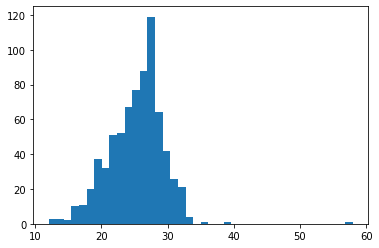

In [78]:
combined_data['Average_Class_Size'].hist(bins=40, grid=False)

The distribution has the appearance of being roughly normal, verified by the calculations below showing the mean and median to be within close proximity to each other. The most frequent grouping, according to the grouped frequency distribution generated below, lies between 26.95 and 28.1; 119 of the values for 'Average Class Size' fall within this range. 

In [79]:
print('Mean: ', np.mean(combined_data['Average_Class_Size']))
print('Median: ', combined_data['Average_Class_Size'].median())

Mean:  25.238797814207665
Median:  25.8


In [80]:
print(combined_data['Average_Class_Size'].value_counts(bins = 40).sort_values(ascending=False).head())

(26.95, 28.1]    119
(25.8, 26.95]     88
(24.65, 25.8]     77
(28.1, 29.25]     64
(22.35, 23.5]     60
Name: Average_Class_Size, dtype: int64


Mean imputation will be used to replace the null values in the 'Average_Class_Size' column:

In [81]:
avg_class_size_mean = round(np.mean(combined_data['Average_Class_Size']), 1)
combined_data['Average_Class_Size'] = combined_data['Average_Class_Size'].fillna(avg_class_size_mean)
combined_data[combined_data['Average_Class_Size'].isnull()]

,DBN,School_Name,Math_Mean_Scale_Score,ELA_Mean_Scale_Score,Major_Crimes_Count,Other_Crimes_Count,Non_Criminal_Crimes_Count,Property_Crimes_Count,Violent_Crimes_Count,Average_Class_Size,Quality_Review_Rating,%_Attendance,%_Chronically_Absent


The null values are gone. 

Verifying that the imputation was successful by viewing the last two rows that formerly contained null values for 'Average_Class_Size':

In [82]:
combined_data.iloc[[674,694]]

,DBN,School_Name,Math_Mean_Scale_Score,ELA_Mean_Scale_Score,Major_Crimes_Count,Other_Crimes_Count,Non_Criminal_Crimes_Count,Property_Crimes_Count,Violent_Crimes_Count,Average_Class_Size,Quality_Review_Rating,%_Attendance,%_Chronically_Absent
674,30Q084,P.S. 084 STEINWAY,310.0,313.0,0.0,0.0,0.0,0.0,0.0,25.2,Proficient,96.3,9.3
694,31R005,P.S. 005 HUGUENOT,314.0,322.0,0.0,2.0,1.0,2.0,0.0,25.2,Well Developed,94.8,11.1


The mean imputation was successful.

Now for the 'Quality_Review_Rating' column:

In [83]:
combined_data[combined_data['Quality_Review_Rating'].isnull()]

,DBN,School_Name,Math_Mean_Scale_Score,ELA_Mean_Scale_Score,Major_Crimes_Count,Other_Crimes_Count,Non_Criminal_Crimes_Count,Property_Crimes_Count,Violent_Crimes_Count,Average_Class_Size,Quality_Review_Rating,%_Attendance,%_Chronically_Absent
11,01M184,P.S. 184M SHUANG WEN,334.0,321.0,1.0,0.0,0.0,0.0,1.0,26.3,NaN,98.4,1.2
13,01M315,THE EAST VILLAGE COMMUNITY SCHOOL,316.0,295.0,1.0,1.0,0.0,1.0,1.0,19.0,NaN,93.2,20.5
14,01M361,THE CHILDREN'S WORKSHOP SCHOOL,304.0,308.0,1.0,1.0,0.0,1.0,1.0,18.0,NaN,94.0,18.4
19,02M002,P.S. 002 MEYER LONDON,318.0,299.0,0.0,1.0,1.0,1.0,0.0,20.7,NaN,97.4,7.6
22,02M011,P.S. 011 WILLIAM T. HARRIS,327.0,317.0,0.0,1.0,0.0,1.0,0.0,26.2,NaN,96.7,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,30Q280,P.S. 280,299.0,288.0,0.0,0.0,0.0,0.0,0.0,23.8,NaN,95.4,8.0
696,31R008,P.S. 8 SHIRLEE SOLOMON,316.0,309.0,0.0,0.0,1.0,0.0,0.0,33.0,NaN,93.8,12.8
733,31R078,PS 78,278.0,271.0,0.0,1.0,2.0,0.0,0.0,25.3,NaN,91.1,29.4
740,32K116,P.S. 116 ELIZABETH L FARRELL,306.0,295.0,0.0,0.0,0.0,0.0,0.0,25.0,NaN,94.6,18.2


There are 111 null values in the 'Quality_Review_Rating' column. To obtain information on quality review ratings for these 111 schools, the 2005 - 2020 Quality Review Ratings dataset is used. This dataset, found at https://data.cityofnewyork.us/Education/2005-2020-Quality-Review-Ratings/3wfy-sn5g, lists the quality review ratings for all schools in NYC from 2005 - 2020.

In [84]:
quality_reviews_2005_2020 = pd.read_csv(r'C:\Users\desid\OneDrive\Documents\Analytics Portfolio\Python\2005_-_2020_Quality_Review_Ratings.csv')
quality_reviews_2005_2020.head()

,BN,School_Year,Start_Date,Overall_Rating,Indicator_1.1,Indicator_1.2,Indicator_1.3,Indicator_1.4,Indicator_1.5,Indicator_1.6,...,Indicator_4.7,IndicatorOverall_4,Indicator_5.1,Indicator_5.2,Indicator_5.3,Indicator_5.4,Indicator_5.5,Indicator_5.6,Indicator_5.7,IndicatorOverall_5
0,M307,2005-06,38810.0,P,P,P,P,P,No Data,No Data,...,WD,WD,P,P,P,P,No Data,No Data,No Data,P
1,M459,2005-06,38810.0,P,P,P,P,P,No Data,No Data,...,P,P,P,P,P,P,No Data,No Data,No Data,P
2,M560,2005-06,38810.0,WD,WD,WD,WD,WD,No Data,No Data,...,WD,WD,WD,WD,WD,WD,No Data,No Data,No Data,WD
3,M294,2005-06,38812.0,WD,WD,WD,WD,WD,No Data,No Data,...,WD,WD,P,P,P,P,No Data,No Data,No Data,P
4,M299,2005-06,38812.0,P,P,P,P,P,No Data,No Data,...,P,P,P,P,P,P,No Data,No Data,No Data,P


The two columns of interest are 'BN' (borough + school ID) and Overall_Rating.

Determining the unique values in the 'School_Year' column:

In [85]:
quality_reviews_2005_2020['School_Year'].unique()

array(['2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17',
       '2017-18', '2018-19', '2019-20', nan], dtype=object)

Filtering to include only 2013-14 and the columns of interest:

In [86]:
quality_reviews_2005_2020 = quality_reviews_2005_2020[quality_reviews_2005_2020['School_Year'] == '2013-14']
quality_reviews_2005_2020 = quality_reviews_2005_2020[['BN', 'Overall_Rating']]
quality_reviews_2005_2020

,BN,Overall_Rating
5308,X036,P
5309,M152,P
5310,M004,P
5311,Q238,P
5312,Q070,P
...,...,...
5823,X162,D
5824,K270,D
5825,K181,P
5826,K347,P


Verifying uniqueness of 'BN' values:

In [87]:
len(quality_reviews_2005_2020['BN'].unique()) == quality_reviews_2005_2020.shape[0]

True

Now a copy of the nulls dataset is generated and a column for 'BN' is added; this is the last four characters of the 'DBN' value.

In [88]:
quality_nulls = combined_data[combined_data['Quality_Review_Rating'].isnull()].copy()
quality_nulls['BN'] = quality_nulls['DBN'].str[-4:]
quality_nulls

,DBN,School_Name,Math_Mean_Scale_Score,ELA_Mean_Scale_Score,Major_Crimes_Count,Other_Crimes_Count,Non_Criminal_Crimes_Count,Property_Crimes_Count,Violent_Crimes_Count,Average_Class_Size,Quality_Review_Rating,%_Attendance,%_Chronically_Absent,BN
11,01M184,P.S. 184M SHUANG WEN,334.0,321.0,1.0,0.0,0.0,0.0,1.0,26.3,NaN,98.4,1.2,M184
13,01M315,THE EAST VILLAGE COMMUNITY SCHOOL,316.0,295.0,1.0,1.0,0.0,1.0,1.0,19.0,NaN,93.2,20.5,M315
14,01M361,THE CHILDREN'S WORKSHOP SCHOOL,304.0,308.0,1.0,1.0,0.0,1.0,1.0,18.0,NaN,94.0,18.4,M361
19,02M002,P.S. 002 MEYER LONDON,318.0,299.0,0.0,1.0,1.0,1.0,0.0,20.7,NaN,97.4,7.6,M002
22,02M011,P.S. 011 WILLIAM T. HARRIS,327.0,317.0,0.0,1.0,0.0,1.0,0.0,26.2,NaN,96.7,4.4,M011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,30Q280,P.S. 280,299.0,288.0,0.0,0.0,0.0,0.0,0.0,23.8,NaN,95.4,8.0,Q280
696,31R008,P.S. 8 SHIRLEE SOLOMON,316.0,309.0,0.0,0.0,1.0,0.0,0.0,33.0,NaN,93.8,12.8,R008
733,31R078,PS 78,278.0,271.0,0.0,1.0,2.0,0.0,0.0,25.3,NaN,91.1,29.4,R078
740,32K116,P.S. 116 ELIZABETH L FARRELL,306.0,295.0,0.0,0.0,0.0,0.0,0.0,25.0,NaN,94.6,18.2,K116


The 'BN' values from quality_reviews_2005_2020 are unique and the 'BN' column has been successfully added to the copy. 

The quality_reviews_2005_2020 and quality_nulls datasets are merged on the 'BN' column to determine common values:

In [89]:
common_values_quality_ratings = pd.merge(quality_reviews_2005_2020, quality_nulls, on=['BN'], how='inner')
common_values_quality_ratings.iloc[:, 0:4]

,BN,Overall_Rating,DBN,School_Name
0,M315,P,01M315,THE EAST VILLAGE COMMUNITY SCHOOL
1,M361,P,01M361,THE CHILDREN'S WORKSHOP SCHOOL


Data is only available for two of the schools out of a total of 111 in the nulls dataframe. 

The corresponding 'DBN' values are located in the combined dataset and the nulls are replaced with a value of 'Proficient':

In [90]:
print(combined_data[combined_data['DBN'].str.endswith('M315')].iloc[:,0])
print(combined_data[combined_data['DBN'].str.endswith('M361')].iloc[:,0])

13    01M315
Name: DBN, dtype: object
14    01M361
Name: DBN, dtype: object


In [91]:
combined_data.iloc[13,10] = 'Proficient'
combined_data.iloc[14,10] = 'Proficient'
combined_data.iloc[[13,14],10]

13    Proficient
14    Proficient
Name: Quality_Review_Rating, dtype: object

The two null values with a rating listed in the 2005 - 2020 Quality Review Dataset are replaced with the data from this dataset. Because the unique values for 'Quality Review Rating' are ordinal, these can be converted to integer values with 4 being the highest and 1 being the lowest. A distribution plot of the values for 'Quality Review Rating' can then be generated and the null values replaced with the appropriate imputation.

Here are the unique values for 'Quality Review Rating':

In [92]:
combined_data['Quality_Review_Rating'].unique()

array(['Proficient', nan, 'Well Developed', 'Developing',
       'Underdeveloped'], dtype=object)

Integer values are assigned as follows:

In [93]:
quality_rating_categories = [
    (combined_data['Quality_Review_Rating'] == 'Underdeveloped'),
    (combined_data['Quality_Review_Rating'] == 'Developing'),
    (combined_data['Quality_Review_Rating'] == 'Proficient'),
    (combined_data['Quality_Review_Rating'] == 'Well Developed')
]
quality_rating_int = [1, 2, 3, 4]
combined_data['Quality_Review_Rating'] = np.select(quality_rating_categories, quality_rating_int)
combined_data

,DBN,School_Name,Math_Mean_Scale_Score,ELA_Mean_Scale_Score,Major_Crimes_Count,Other_Crimes_Count,Non_Criminal_Crimes_Count,Property_Crimes_Count,Violent_Crimes_Count,Average_Class_Size,Quality_Review_Rating,%_Attendance,%_Chronically_Absent
0,01M015,P.S. 015 ROBERTO CLEMENTE,286.0,285.0,2.0,1.0,1.0,2.0,1.0,16.0,3,92.8,20.0
1,01M019,P.S. 019 ASHER LEVY,311.0,304.0,1.0,3.0,1.0,1.0,1.0,14.0,3,91.8,26.1
2,01M020,P.S. 020 ANNA SILVER,296.0,279.0,0.0,2.0,2.0,2.0,0.0,25.2,3,94.6,15.0
3,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,283.0,270.0,0.0,0.0,1.0,0.0,0.0,14.5,3,90.4,40.0
4,01M063,THE STAR ACADEMY - P.S.63,308.0,294.0,0.0,0.0,2.0,0.0,0.0,23.0,3,90.0,45.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,32K274,P.S. 274 KOSCIUSKO,284.0,275.0,0.0,0.0,1.0,0.0,0.0,32.3,3,92.4,25.5
745,32K299,P.S. 299 THOMAS WARREN FIELD,307.0,297.0,0.0,1.0,1.0,0.0,1.0,23.5,3,92.0,30.4
746,32K376,P.S. 376,299.0,295.0,0.0,0.0,0.0,0.0,0.0,30.3,3,94.4,15.3
747,32K377,P.S. 377 ALEJANDRINA B. DE GAUTIER,285.0,273.0,0.0,2.0,1.0,0.0,0.0,18.5,2,92.5,20.5


Double checking the converted values:

In [94]:
np.unique(combined_data['Quality_Review_Rating'])

array([0, 1, 2, 3, 4])

Here is a distribution plot of the values for 'Quality_Review_Rating':

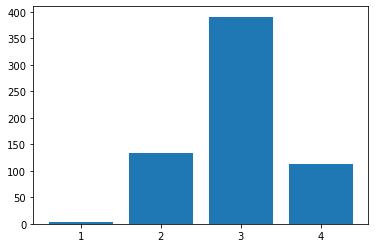

In [95]:
labels, counts = np.unique(combined_data[combined_data['Quality_Review_Rating'] > 0]['Quality_Review_Rating'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()

The plot reflects an approximately normal distribution, verified by the calculations below:

In [96]:
quality_nonzero_mean = np.mean(combined_data[combined_data['Quality_Review_Rating'] != 0]['Quality_Review_Rating'])
quality_nonzero_median = np.median(combined_data[combined_data['Quality_Review_Rating'] != 0]['Quality_Review_Rating'])
print('Mean: ', quality_nonzero_mean)
print('Median: ', quality_nonzero_median)

Mean:  2.95625
Median:  3.0


The mean is very close to 3, the median and corresponding integer value for 'Proficient'. A glance at the plot reveals that the mode is also 3. Once again, the mean is chosen for the imputed value, calculated from nonzero integers only. The decimal is rounded and '0' replaced with the new value:

In [97]:
combined_data['Quality_Review_Rating'] = combined_data['Quality_Review_Rating'].replace(0, quality_nonzero_mean).astype(int)
combined_data

,DBN,School_Name,Math_Mean_Scale_Score,ELA_Mean_Scale_Score,Major_Crimes_Count,Other_Crimes_Count,Non_Criminal_Crimes_Count,Property_Crimes_Count,Violent_Crimes_Count,Average_Class_Size,Quality_Review_Rating,%_Attendance,%_Chronically_Absent
0,01M015,P.S. 015 ROBERTO CLEMENTE,286.0,285.0,2.0,1.0,1.0,2.0,1.0,16.0,3,92.8,20.0
1,01M019,P.S. 019 ASHER LEVY,311.0,304.0,1.0,3.0,1.0,1.0,1.0,14.0,3,91.8,26.1
2,01M020,P.S. 020 ANNA SILVER,296.0,279.0,0.0,2.0,2.0,2.0,0.0,25.2,3,94.6,15.0
3,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,283.0,270.0,0.0,0.0,1.0,0.0,0.0,14.5,3,90.4,40.0
4,01M063,THE STAR ACADEMY - P.S.63,308.0,294.0,0.0,0.0,2.0,0.0,0.0,23.0,3,90.0,45.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,32K274,P.S. 274 KOSCIUSKO,284.0,275.0,0.0,0.0,1.0,0.0,0.0,32.3,3,92.4,25.5
745,32K299,P.S. 299 THOMAS WARREN FIELD,307.0,297.0,0.0,1.0,1.0,0.0,1.0,23.5,3,92.0,30.4
746,32K376,P.S. 376,299.0,295.0,0.0,0.0,0.0,0.0,0.0,30.3,3,94.4,15.3
747,32K377,P.S. 377 ALEJANDRINA B. DE GAUTIER,285.0,273.0,0.0,2.0,1.0,0.0,0.0,18.5,2,92.5,20.5


In [98]:
np.unique(combined_data['Quality_Review_Rating'])

array([1, 2, 3, 4])

The '%_Attendance' column contains 7 null values:

In [99]:
combined_data[combined_data['%_Attendance'].isnull()]

,DBN,School_Name,Math_Mean_Scale_Score,ELA_Mean_Scale_Score,Major_Crimes_Count,Other_Crimes_Count,Non_Criminal_Crimes_Count,Property_Crimes_Count,Violent_Crimes_Count,Average_Class_Size,Quality_Review_Rating,%_Attendance,%_Chronically_Absent
184,09X132,P.S. 132 GARRET A. MORGAN,282.0,276.0,0.0,0.0,0.0,0.0,0.0,22.3,2,NaN,NaN
189,09X230,P.S. 230 DR ROLAND N. PATTERSON,282.0,279.0,0.0,5.0,3.0,3.0,2.0,25.0,2,NaN,NaN
193,09X457,SHERIDAN ACADEMY FOR YOUNG LEADERS,290.0,278.0,0.0,3.0,3.0,0.0,0.0,25.0,3,NaN,NaN
239,11X078,P.S. 078 ANNE HUTCHINSON,285.0,280.0,1.0,1.0,2.0,2.0,0.0,25.5,3,NaN,NaN
415,20K102,P.S. 102 THE BAYVIEW,327.0,318.0,0.0,1.0,1.0,1.0,0.0,29.0,3,NaN,NaN
514,24Q071,P.S. 071 FOREST,311.0,302.0,0.0,1.0,3.0,1.0,0.0,21.2,2,NaN,NaN
583,27Q056,P.S. 056 HARRY EICHLER,307.0,304.0,0.0,0.0,0.0,0.0,0.0,24.2,3,NaN,NaN


The '%_Chronically_Absent' column also contains 7 null values in the same rows; the null items in both these columns can be deleted pairwise. Total pairwise deletions amount to 13 rows out of 749 -- less than 2% of total rows.

The data has been cleaned and is now ready for analysis.  

For third grade students attending school in New York State in the spring of 2014, Common Core assessment scale scoring was as follows: 128-284 for Mathematics, 148-290 for ELA (Level 1 -- below proficient); 285-313 for Mathematics, 291-319 for ELA (Level 2 -- partially proficient); 314-339 for Mathematics, 320-357 for ELA (Level 3 -- proficient); 340-399 for Mathematics, 358-419 for ELA (Level 4 -- excelling). This information can be found at http://www.p12.nysed.gov/irs/ela-math/.

Before examining correlations, an exploratory analysis must be performed. Two columns must be added to the dataframe -- 'Math_Level' and 'ELA_Level' -- indicating which level is represented by the mean scale score in each column.

In [100]:
conditions = [(128 <= combined_data['Math_Mean_Scale_Score']) & (combined_data['Math_Mean_Scale_Score'] <= 284), (285 <= combined_data['Math_Mean_Scale_Score']) & (combined_data['Math_Mean_Scale_Score'] <= 313), (314 <= combined_data['Math_Mean_Scale_Score']) & (combined_data['Math_Mean_Scale_Score'] <= 339), (340 <= combined_data['Math_Mean_Scale_Score']) & (combined_data['Math_Mean_Scale_Score'] <= 399)]
values = ['1', '2', '3', '4']
combined_data['Math_Mean_Level'] = np.select(conditions, values)

conditions = [(148 <= combined_data['ELA_Mean_Scale_Score']) & (combined_data['ELA_Mean_Scale_Score'] <= 290), (291 <= combined_data['ELA_Mean_Scale_Score']) & (combined_data['ELA_Mean_Scale_Score'] <= 319), (320 <= combined_data['ELA_Mean_Scale_Score']) & (combined_data['ELA_Mean_Scale_Score'] <= 357), (358 <= combined_data['ELA_Mean_Scale_Score']) & (combined_data['ELA_Mean_Scale_Score'] <= 419)]
values = ['1', '2', '3', '4']
combined_data['ELA_Mean_Level'] = np.select(conditions, values)

combined_data

,DBN,School_Name,Math_Mean_Scale_Score,ELA_Mean_Scale_Score,Major_Crimes_Count,Other_Crimes_Count,Non_Criminal_Crimes_Count,Property_Crimes_Count,Violent_Crimes_Count,Average_Class_Size,Quality_Review_Rating,%_Attendance,%_Chronically_Absent,Math_Mean_Level,ELA_Mean_Level
0,01M015,P.S. 015 ROBERTO CLEMENTE,286.0,285.0,2.0,1.0,1.0,2.0,1.0,16.0,3,92.8,20.0,2,1
1,01M019,P.S. 019 ASHER LEVY,311.0,304.0,1.0,3.0,1.0,1.0,1.0,14.0,3,91.8,26.1,2,2
2,01M020,P.S. 020 ANNA SILVER,296.0,279.0,0.0,2.0,2.0,2.0,0.0,25.2,3,94.6,15.0,2,1
3,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,283.0,270.0,0.0,0.0,1.0,0.0,0.0,14.5,3,90.4,40.0,1,1
4,01M063,THE STAR ACADEMY - P.S.63,308.0,294.0,0.0,0.0,2.0,0.0,0.0,23.0,3,90.0,45.8,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,32K274,P.S. 274 KOSCIUSKO,284.0,275.0,0.0,0.0,1.0,0.0,0.0,32.3,3,92.4,25.5,1,1
745,32K299,P.S. 299 THOMAS WARREN FIELD,307.0,297.0,0.0,1.0,1.0,0.0,1.0,23.5,3,92.0,30.4,2,2
746,32K376,P.S. 376,299.0,295.0,0.0,0.0,0.0,0.0,0.0,30.3,3,94.4,15.3,2,2
747,32K377,P.S. 377 ALEJANDRINA B. DE GAUTIER,285.0,273.0,0.0,2.0,1.0,0.0,0.0,18.5,2,92.5,20.5,2,1


In [101]:
print('Math Level Unique: ', combined_data['Math_Mean_Level'].unique())
print('ELA Level Unique: ', combined_data['ELA_Mean_Level'].unique())

Math Level Unique:  ['2' '1' '3' '4']
ELA Level Unique:  ['1' '2' '3']


The two columns have been successfully added and the values appended.

Below are the frequencies and relative frequencies of mean score levels for the mathematics and ELA exams with their corresponding visualizations:

Math Level Value Counts and Relative Frequencies:  
 2    392
3    181
1    160
4     16
Name: Math_Mean_Level, dtype: int64 
 2    0.523364
3    0.241656
1    0.213618
4    0.021362
Name: Math_Mean_Level, dtype: float64

ELA Level Value Counts and Relative Frequencies:  
 2    376
1    303
3     70
Name: ELA_Mean_Level, dtype: int64 
 2    0.502003
1    0.404539
3    0.093458
Name: ELA_Mean_Level, dtype: float64


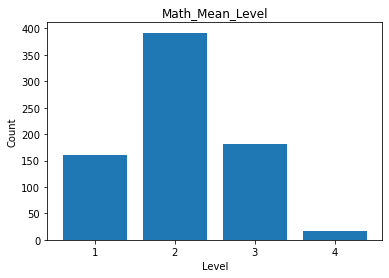

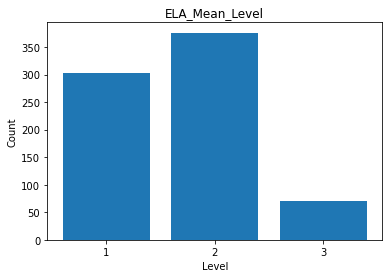

In [102]:
count_math_mean_level = combined_data['Math_Mean_Level'].value_counts()
count_ela_mean_level = combined_data['ELA_Mean_Level'].value_counts()
print('Math Level Value Counts and Relative Frequencies: ', '\n', count_math_mean_level, '\n', count_math_mean_level/len(combined_data['Math_Mean_Level']))
print()
print('ELA Level Value Counts and Relative Frequencies: ', '\n', count_ela_mean_level, '\n', count_ela_mean_level/len(combined_data['ELA_Mean_Level']))
for c in ['Math_Mean_Level', 'ELA_Mean_Level']:
    labels, counts = np.unique(combined_data[c], return_counts=True)
    plt.bar(labels, counts, align='center')
    plt.gca().set_xticks(labels)
    plt.title(f'{c}')
    plt.xlabel('Level')
    plt.ylabel('Count')
    plt.show()

Mean scores at Level 2 -- partially proficient -- occurred with the greatest frequency for both exams.

From the frequency data above, the frequency of Level 3 mean scale scores among NYC schools -- indicating proficient performance on average -- was substantially higher for the mathematics exam at 181 (24.2%) compared to a frequency of 70 (9.3%) for ELA. Level 1 performance frequency -- below proficient -- was considerably higher for the ELA exam at 303 (40.5%) compared to mathematics at 160 (24.2%).

Below, the mean scale score distributions for all schools are plotted on the same graph:

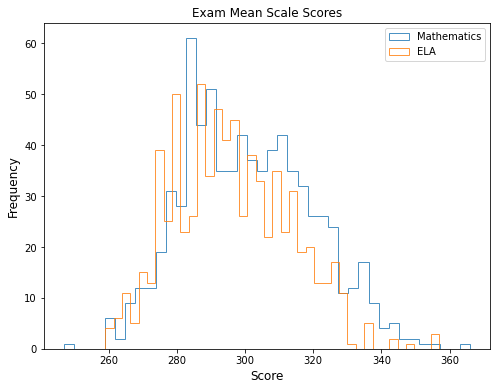

In [103]:
plt.figure(figsize=(8,6))
plt.hist(combined_data['Math_Mean_Scale_Score'], bins=40, alpha=0.8, label='Mathematics', histtype = 'step')
plt.hist(combined_data['ELA_Mean_Scale_Score'], bins=40, alpha=0.8, label='ELA', histtype = 'step')

plt.xlabel('Score', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Exam Mean Scale Scores')
plt.legend(loc='upper right')

Now the number of schools reflecting higher average levels in either mathematics or ELA and the number reflecting averages at the same level for both subjects are explored. To visualize the data, a column is added which reflects a comparison of the mean score levels: 

In [104]:
combined_data['Math_Mean_Level'] = combined_data['Math_Mean_Level'].astype(int)
combined_data['ELA_Mean_Level'] = combined_data['ELA_Mean_Level'].astype(int)

conditions = [combined_data['Math_Mean_Level'] > combined_data['ELA_Mean_Level'], combined_data['Math_Mean_Level'] < combined_data['ELA_Mean_Level'], combined_data['Math_Mean_Level'] == combined_data['ELA_Mean_Level']]
values = ['Math_Higher_Level', 'ELA_Higher_Level', 'Equal_Level']
combined_data['Level_Comparison'] = np.select(conditions, values)

combined_data

,DBN,School_Name,Math_Mean_Scale_Score,ELA_Mean_Scale_Score,Major_Crimes_Count,Other_Crimes_Count,Non_Criminal_Crimes_Count,Property_Crimes_Count,Violent_Crimes_Count,Average_Class_Size,Quality_Review_Rating,%_Attendance,%_Chronically_Absent,Math_Mean_Level,ELA_Mean_Level,Level_Comparison
0,01M015,P.S. 015 ROBERTO CLEMENTE,286.0,285.0,2.0,1.0,1.0,2.0,1.0,16.0,3,92.8,20.0,2,1,Math_Higher_Level
1,01M019,P.S. 019 ASHER LEVY,311.0,304.0,1.0,3.0,1.0,1.0,1.0,14.0,3,91.8,26.1,2,2,Equal_Level
2,01M020,P.S. 020 ANNA SILVER,296.0,279.0,0.0,2.0,2.0,2.0,0.0,25.2,3,94.6,15.0,2,1,Math_Higher_Level
3,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,283.0,270.0,0.0,0.0,1.0,0.0,0.0,14.5,3,90.4,40.0,1,1,Equal_Level
4,01M063,THE STAR ACADEMY - P.S.63,308.0,294.0,0.0,0.0,2.0,0.0,0.0,23.0,3,90.0,45.8,2,2,Equal_Level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,32K274,P.S. 274 KOSCIUSKO,284.0,275.0,0.0,0.0,1.0,0.0,0.0,32.3,3,92.4,25.5,1,1,Equal_Level
745,32K299,P.S. 299 THOMAS WARREN FIELD,307.0,297.0,0.0,1.0,1.0,0.0,1.0,23.5,3,92.0,30.4,2,2,Equal_Level
746,32K376,P.S. 376,299.0,295.0,0.0,0.0,0.0,0.0,0.0,30.3,3,94.4,15.3,2,2,Equal_Level
747,32K377,P.S. 377 ALEJANDRINA B. DE GAUTIER,285.0,273.0,0.0,2.0,1.0,0.0,0.0,18.5,2,92.5,20.5,2,1,Math_Higher_Level


Below are the frequencies, relative frequencies, and visualizations:

Higher Mean Math Level Count / Relative Frequency:  297  /  0.3965287049399199
Higher Mean ELA Level Count / Relative Frequency:  11  /  0.014686248331108143
Equal Mean Level Count / Relative Frequency:  441  /  0.5887850467289719


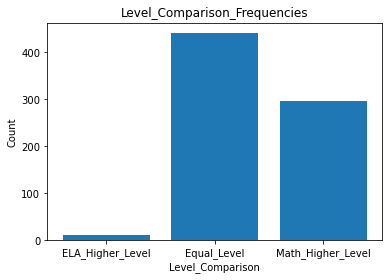

In [105]:
higher_math = combined_data['Level_Comparison'] == 'Math_Higher_Level'
higher_ela = combined_data['Level_Comparison'] == 'ELA_Higher_Level'
equal = combined_data['Level_Comparison'] == 'Equal_Level'

print('Higher Mean Math Level Count / Relative Frequency: ', combined_data[higher_math].shape[0], ' / ', combined_data[higher_math].shape[0]/combined_data.shape[0])
print('Higher Mean ELA Level Count / Relative Frequency: ', combined_data[higher_ela].shape[0], ' / ', combined_data[higher_ela].shape[0]/combined_data.shape[0])
print('Equal Mean Level Count / Relative Frequency: ', combined_data[equal].shape[0], ' / ', combined_data[equal].shape[0]/combined_data.shape[0])

labels, counts = np.unique(combined_data['Level_Comparison'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('Level_Comparison_Frequencies')
plt.xlabel('Level_Comparison')
plt.ylabel('Count')
plt.show()

There were a far greater number of instances of the math mean level being higher than the ELA level; 297 schools (39.7%) reflected a higher average performance level in mathematics while 11 schools (1.5%) reflected a higher average performance level in ELA. 

There were 441 instances of equal mean level performance in math and ELA. Of these 441 instances, the frequency and relative frequency of levels for 'Equal Mean Level Count' are determined:

Equal Mean Level Frequencies and Relative Frequencies By Level:  
 2    238
1    152
3     51
Name: Math_Mean_Level, dtype: int64 
 2    0.317757
1    0.202937
3    0.068091
Name: Math_Mean_Level, dtype: float64


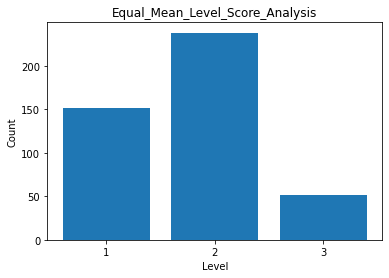

In [106]:
equal_mean_level_freq_by_level = combined_data[equal]['Math_Mean_Level'].value_counts()
print('Equal Mean Level Frequencies and Relative Frequencies By Level: ', '\n', equal_mean_level_freq_by_level, '\n', equal_mean_level_freq_by_level/len(combined_data['Math_Mean_Level']))

equal_mean_level = combined_data[equal]

labels, counts = np.unique(equal_mean_level['Math_Mean_Level'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('Equal_Mean_Level_Score_Analysis')
plt.xlabel('Level')
plt.ylabel('Count')
plt.show()

Of the instances wherein the mean performance levels were equal for mathematics and ELA, this most commonly occurred at level 2 proficiency (partially proficient) with a frequency of 238 (31.8%).

The total number of crimes by crime type that occurred in NYC public schools in the year 2014 is as follows:

In [107]:
crime_cols = ['Major_Crimes_Count', 'Other_Crimes_Count', 'Non_Criminal_Crimes_Count', 'Property_Crimes_Count', 'Violent_Crimes_Count']
crime_type_freq = {}
for c in crime_cols:
    crime_type_freq[c] = np.sum(combined_data[c])
print(crime_type_freq)

{'Major_Crimes_Count': 207.0, 'Other_Crimes_Count': 586.0, 'Non_Criminal_Crimes_Count': 708.0, 'Property_Crimes_Count': 499.0, 'Violent_Crimes_Count': 215.0}


The greatest number of crimes (708) were non-criminal; the least number were major crimes (207).

Below are shown the number of schools at which the various types of crimes occurred:

In [108]:
schools_crime_freq_by_type = {}
for c in crime_cols:
    schools_crime_freq_by_type[c] = combined_data[combined_data[c] > 0].shape[0]
print(schools_crime_freq_by_type)

{'Major_Crimes_Count': 164, 'Other_Crimes_Count': 320, 'Non_Criminal_Crimes_Count': 366, 'Property_Crimes_Count': 309, 'Violent_Crimes_Count': 150}


Non-criminal crimes occurred at most of the schools (366 in total).

The average number of crimes per school by crime type for the year 2014 is calculated below:

In [109]:
for c in crime_cols:
    print(f'Average {c} per school: ', round(crime_type_freq[c]/schools_crime_freq_by_type[c], 1))

Average Major_Crimes_Count per school:  1.3
Average Other_Crimes_Count per school:  1.8
Average Non_Criminal_Crimes_Count per school:  1.9
Average Property_Crimes_Count per school:  1.6
Average Violent_Crimes_Count per school:  1.4


The average for non-criminal crimes (1.9 per school) was the greatest, while the average for major crimes (1.3 per school) was the least.

The average mean scale score for schools with violent crime is compared to that of schools without violent crime:

In [110]:
print('Math avg violent crime: ', np.mean(combined_data[combined_data['Violent_Crimes_Count'] > 0.0]['Math_Mean_Scale_Score']))
print('Math avg no violent crime: ', np.mean(combined_data[combined_data['Violent_Crimes_Count'] == 0.0]['Math_Mean_Scale_Score']))
print()
print('ELA avg violent crime: ', np.mean(combined_data[combined_data['Violent_Crimes_Count'] > 0.0]['ELA_Mean_Scale_Score']))
print('ELA avg no violent crime: ', np.mean(combined_data[combined_data['Violent_Crimes_Count'] == 0.0]['ELA_Mean_Scale_Score']))

Math avg violent crime:  294.86
Math avg no violent crime:  302.43676222596963

ELA avg violent crime:  291.3066666666667
ELA avg no violent crime:  297.31197301854974


The average mean scale scores for both mathematics and ELA are higher for the schools with no violent crime.

Below are plots showing the number of schools where the designated count of each crime type occurred:

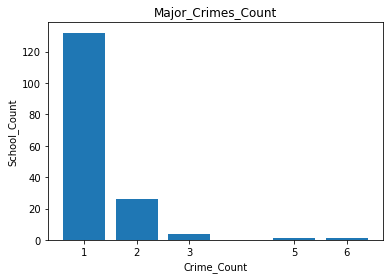

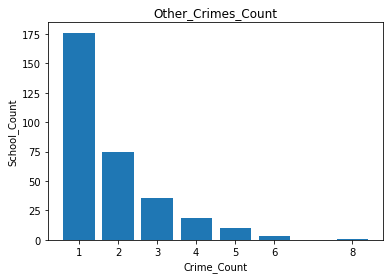

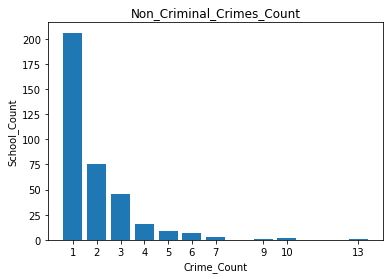

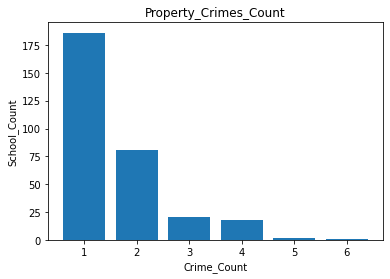

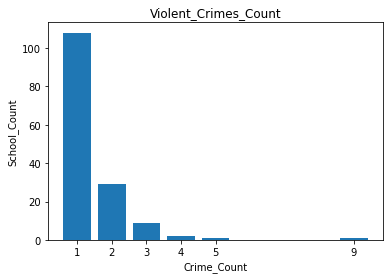

In [111]:
for c in crime_cols:
    labels, counts = np.unique(combined_data[combined_data[c] > 0][c], return_counts=True)
    plt.bar(labels, counts, align='center')
    plt.gca().set_xticks(labels)
    plt.title(f'{c}')
    plt.xlabel('Crime_Count')
    plt.ylabel('School_Count')
    plt.show()

Only one of each crime type occurred at the vast majority of the schools at which crimes occurred in the year 2014.

After some preliminary exploration, correlations with mean scale scores for examinations in both subjects are investigated:

In [112]:
combined_data.corr()

,Math_Mean_Scale_Score,ELA_Mean_Scale_Score,Major_Crimes_Count,Other_Crimes_Count,Non_Criminal_Crimes_Count,Property_Crimes_Count,Violent_Crimes_Count,Average_Class_Size,Quality_Review_Rating,%_Attendance,%_Chronically_Absent,Math_Mean_Level,ELA_Mean_Level
Math_Mean_Scale_Score,1.000000,0.926349,-0.119717,-0.217977,-0.196995,-0.182342,-0.136522,0.160991,0.254863,0.716994,-0.709619,0.908631,0.832503
ELA_Mean_Scale_Score,0.926349,1.000000,-0.105008,-0.203924,-0.191360,-0.166704,-0.115705,0.169418,0.256350,0.681099,-0.685403,0.845836,0.886756
Major_Crimes_Count,-0.119717,-0.105008,1.000000,0.208313,0.316966,0.552389,0.420334,-0.048360,-0.046179,-0.141134,0.153928,-0.111896,-0.124189
Other_Crimes_Count,-0.217977,-0.203924,0.208313,1.000000,0.442314,0.704801,0.610292,-0.130573,-0.011218,-0.243756,0.251317,-0.180697,-0.203509
Non_Criminal_Crimes_Count,-0.196995,-0.191360,0.316966,0.442314,1.000000,0.313970,0.441732,-0.054078,-0.030656,-0.278324,0.272935,-0.150847,-0.184817
Property_Crimes_Count,-0.182342,-0.166704,0.552389,0.704801,0.313970,1.000000,0.201117,-0.117688,-0.019316,-0.204637,0.218559,-0.153638,-0.180612
Violent_Crimes_Count,-0.136522,-0.115705,0.420334,0.610292,0.441732,0.201117,1.000000,-0.055979,-0.021278,-0.161232,0.169702,-0.114621,-0.116009
Average_Class_Size,0.160991,0.169418,-0.048360,-0.130573,-0.054078,-0.117688,-0.055979,1.000000,0.120820,0.289720,-0.296488,0.148110,0.161744
Quality_Review_Rating,0.254863,0.256350,-0.046179,-0.011218,-0.030656,-0.019316,-0.021278,0.120820,1.000000,0.235200,-0.237358,0.244848,0.260112
%_Attendance,0.716994,0.681099,-0.141134,-0.243756,-0.278324,-0.204637,-0.161232,0.289720,0.235200,1.000000,-0.958353,0.657914,0.638821


<AxesSubplot:>

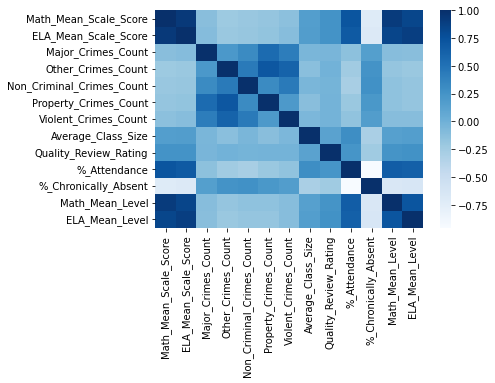

In [113]:
sns.heatmap(combined_data.corr(), cmap='Blues')

The variables with which correlations will be established are 'Math_Mean_Scale_Score' and 'ELA_Mean_Scale_Score'. According to the correlation matrix and heatmap above, the direction of the correlations are for the most part what one might expect. For each exam type, scores correlate positively with the scores for the other exam type, quality review ratings, and attendance while correlating negatively with the presence of crime (all types) and chronic absence.

Correlations with an absolute value of 0.2 or greater are isolated and plotted:

In [114]:
combined_data.corr()[abs(combined_data.corr()) >= 0.2].iloc[:,0:2].dropna()

,Math_Mean_Scale_Score,ELA_Mean_Scale_Score
Math_Mean_Scale_Score,1.000000,0.926349
ELA_Mean_Scale_Score,0.926349,1.000000
Other_Crimes_Count,-0.217977,-0.203924
Quality_Review_Rating,0.254863,0.256350
%_Attendance,0.716994,0.681099
%_Chronically_Absent,-0.709619,-0.685403
Math_Mean_Level,0.908631,0.845836
ELA_Mean_Level,0.832503,0.886756


'Math_Mean_Level' and 'ELA_Mean_Level' are excluded; these columns were created based on their respective mean scale score columns for exploratory purposes. For each exam type, it is observed that there are substantial correlations with scores for the other exam type (0.93), attendance (mathematics 0.72, ELA 0.68), and chronic absence (mathematics -0.71, ELA -0.69).

Correlations with mean scale scores for the mathematics and ELA examinations are plotted below:

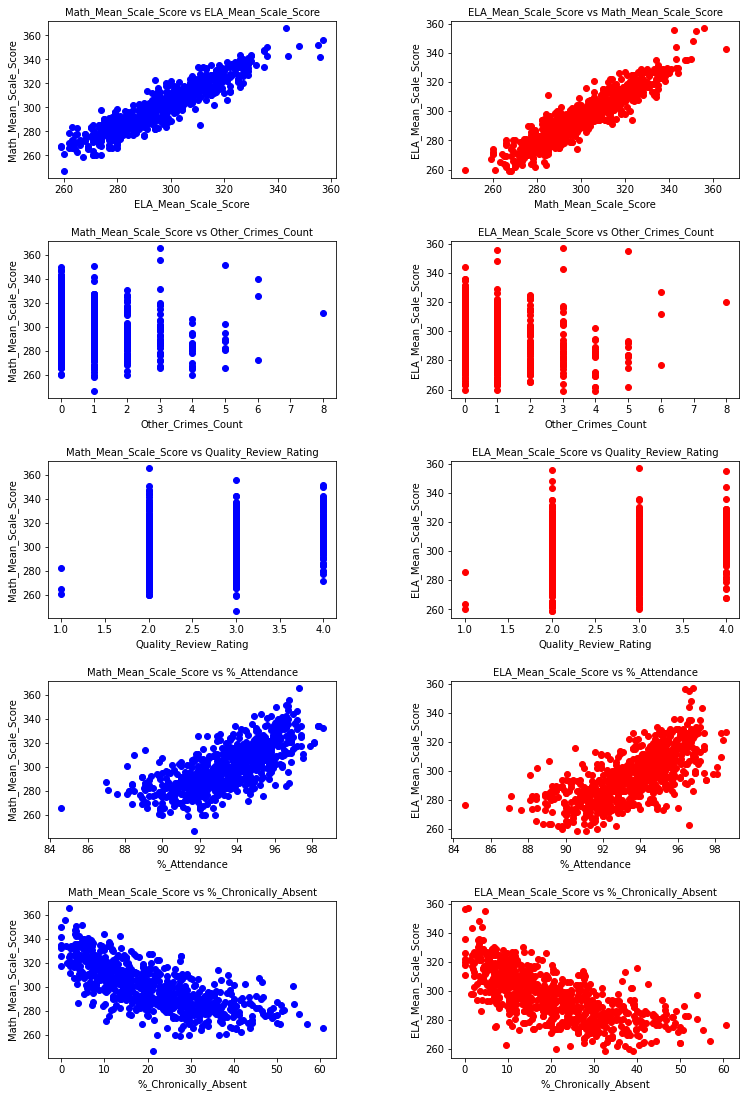

In [115]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(18)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.subplot(5, 2, 1) 
plt.scatter(combined_data[combined_data['ELA_Mean_Scale_Score'].notnull()]['ELA_Mean_Scale_Score'], combined_data[combined_data['ELA_Mean_Scale_Score'].notnull()]['Math_Mean_Scale_Score'], color='blue')
plt.title('Math_Mean_Scale_Score vs ELA_Mean_Scale_Score', fontsize=10)
plt.xlabel('ELA_Mean_Scale_Score', fontsize=10)
plt.ylabel('Math_Mean_Scale_Score', fontsize=10)

plt.subplot(5, 2, 2) 
plt.scatter(combined_data[combined_data['Math_Mean_Scale_Score'].notnull()]['Math_Mean_Scale_Score'], combined_data[combined_data['Math_Mean_Scale_Score'].notnull()]['ELA_Mean_Scale_Score'], color='red')
plt.title('ELA_Mean_Scale_Score vs Math_Mean_Scale_Score', fontsize=10)
plt.xlabel('Math_Mean_Scale_Score', fontsize=10)
plt.ylabel('ELA_Mean_Scale_Score', fontsize=10)

plt.subplot(5, 2, 3) 
plt.scatter(combined_data[combined_data['Other_Crimes_Count'].notnull()]['Other_Crimes_Count'], combined_data[combined_data['Other_Crimes_Count'].notnull()]['Math_Mean_Scale_Score'], color='blue')
plt.title('Math_Mean_Scale_Score vs Other_Crimes_Count', fontsize=10)
plt.xlabel('Other_Crimes_Count', fontsize=10)
plt.ylabel('Math_Mean_Scale_Score', fontsize=10)

plt.subplot(5, 2, 4) 
plt.scatter(combined_data[combined_data['Other_Crimes_Count'].notnull()]['Other_Crimes_Count'], combined_data[combined_data['Other_Crimes_Count'].notnull()]['ELA_Mean_Scale_Score'], color='red')
plt.title('ELA_Mean_Scale_Score vs Other_Crimes_Count', fontsize=10)
plt.xlabel('Other_Crimes_Count', fontsize=10)
plt.ylabel('ELA_Mean_Scale_Score', fontsize=10)

plt.subplot(5, 2, 5) 
plt.scatter(combined_data[combined_data['Quality_Review_Rating'].notnull()]['Quality_Review_Rating'], combined_data[combined_data['Quality_Review_Rating'].notnull()]['Math_Mean_Scale_Score'], color='blue')
plt.title('Math_Mean_Scale_Score vs Quality_Review_Rating', fontsize=10)
plt.xlabel('Quality_Review_Rating', fontsize=10)
plt.ylabel('Math_Mean_Scale_Score', fontsize=10)

plt.subplot(5, 2, 6) 
plt.scatter(combined_data[combined_data['Quality_Review_Rating'].notnull()]['Quality_Review_Rating'], combined_data[combined_data['Quality_Review_Rating'].notnull()]['ELA_Mean_Scale_Score'], color='red')
plt.title('ELA_Mean_Scale_Score vs Quality_Review_Rating', fontsize=10)
plt.xlabel('Quality_Review_Rating', fontsize=10)
plt.ylabel('ELA_Mean_Scale_Score', fontsize=10)

plt.subplot(5, 2, 7) 
plt.scatter(combined_data[combined_data['%_Attendance'].notnull()]['%_Attendance'], combined_data[combined_data['%_Attendance'].notnull()]['Math_Mean_Scale_Score'], color='blue')
plt.title('Math_Mean_Scale_Score vs %_Attendance', fontsize=10)
plt.xlabel('%_Attendance', fontsize=10)
plt.ylabel('Math_Mean_Scale_Score', fontsize=10)

plt.subplot(5, 2, 8) 
plt.scatter(combined_data[combined_data['%_Attendance'].notnull()]['%_Attendance'], combined_data[combined_data['%_Attendance'].notnull()]['ELA_Mean_Scale_Score'], color='red')
plt.title('ELA_Mean_Scale_Score vs %_Attendance', fontsize=10)
plt.xlabel('%_Attendance', fontsize=10)
plt.ylabel('ELA_Mean_Scale_Score', fontsize=10)

plt.subplot(5, 2, 9) 
plt.scatter(combined_data[combined_data['%_Chronically_Absent'].notnull()]['%_Chronically_Absent'], combined_data[combined_data['%_Chronically_Absent'].notnull()]['Math_Mean_Scale_Score'], color='blue')
plt.title('Math_Mean_Scale_Score vs %_Chronically_Absent', fontsize=10)
plt.xlabel('%_Chronically_Absent', fontsize=10)
plt.ylabel('Math_Mean_Scale_Score', fontsize=10)

plt.subplot(5, 2, 10) 
plt.scatter(combined_data[combined_data['%_Chronically_Absent'].notnull()]['%_Chronically_Absent'], combined_data[combined_data['%_Chronically_Absent'].notnull()]['ELA_Mean_Scale_Score'], color='red')
plt.title('ELA_Mean_Scale_Score vs %_Chronically_Absent', fontsize=10)
plt.xlabel('%_Chronically_Absent', fontsize=10)
plt.ylabel('ELA_Mean_Scale_Score', fontsize=10)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

For each exam type, there are linear correlations with mean scale scores for the other exam (positive), percent attendance (positive), and chronic absence (negative). Regression lines and their respective equations are shown below for each correlation:

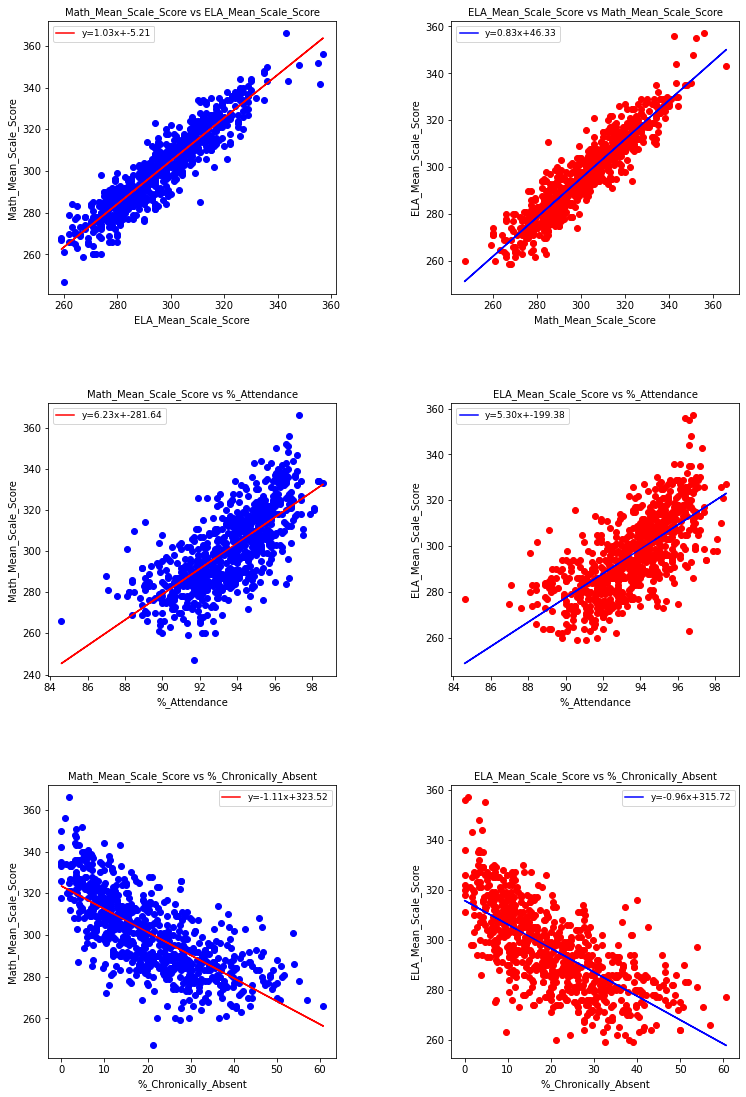

In [116]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(18)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.subplot(3, 2, 1) 
plt.scatter(combined_data[combined_data['ELA_Mean_Scale_Score'].notnull()]['ELA_Mean_Scale_Score'], combined_data[combined_data['ELA_Mean_Scale_Score'].notnull()]['Math_Mean_Scale_Score'], color='blue')
plt.title('Math_Mean_Scale_Score vs ELA_Mean_Scale_Score', fontsize=10)
plt.xlabel('ELA_Mean_Scale_Score', fontsize=10)
plt.ylabel('Math_Mean_Scale_Score', fontsize=10)
x = combined_data[combined_data['ELA_Mean_Scale_Score'].notnull()]['ELA_Mean_Scale_Score']
y = combined_data[combined_data['ELA_Mean_Scale_Score'].notnull()]['Math_Mean_Scale_Score']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='red', label='y={:.2f}x+{:.2f}'.format(m, b))
plt.legend(fontsize=9)

plt.subplot(3, 2, 2) 
plt.scatter(combined_data[combined_data['Math_Mean_Scale_Score'].notnull()]['Math_Mean_Scale_Score'], combined_data[combined_data['Math_Mean_Scale_Score'].notnull()]['ELA_Mean_Scale_Score'], color='red')
plt.title('ELA_Mean_Scale_Score vs Math_Mean_Scale_Score', fontsize=10)
plt.xlabel('Math_Mean_Scale_Score', fontsize=10)
plt.ylabel('ELA_Mean_Scale_Score', fontsize=10)
x = combined_data[combined_data['Math_Mean_Scale_Score'].notnull()]['Math_Mean_Scale_Score']
y = combined_data[combined_data['Math_Mean_Scale_Score'].notnull()]['ELA_Mean_Scale_Score']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='blue', label='y={:.2f}x+{:.2f}'.format(m, b))
plt.legend(fontsize=9)

plt.subplot(3, 2, 3) 
plt.scatter(combined_data[combined_data['%_Attendance'].notnull()]['%_Attendance'], combined_data[combined_data['%_Attendance'].notnull()]['Math_Mean_Scale_Score'], color='blue')
plt.title('Math_Mean_Scale_Score vs %_Attendance', fontsize=10)
plt.xlabel('%_Attendance', fontsize=10)
plt.ylabel('Math_Mean_Scale_Score', fontsize=10)
x = combined_data[combined_data['%_Attendance'].notnull()]['%_Attendance']
y = combined_data[combined_data['%_Attendance'].notnull()]['Math_Mean_Scale_Score']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='red', label='y={:.2f}x+{:.2f}'.format(m, b))
plt.legend(fontsize=9)

plt.subplot(3, 2, 4) 
plt.scatter(combined_data[combined_data['%_Attendance'].notnull()]['%_Attendance'], combined_data[combined_data['%_Attendance'].notnull()]['ELA_Mean_Scale_Score'], color='red')
plt.title('ELA_Mean_Scale_Score vs %_Attendance', fontsize=10)
plt.xlabel('%_Attendance', fontsize=10)
plt.ylabel('ELA_Mean_Scale_Score', fontsize=10)
x = combined_data[combined_data['%_Attendance'].notnull()]['%_Attendance']
y = combined_data[combined_data['%_Attendance'].notnull()]['ELA_Mean_Scale_Score']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='blue', label='y={:.2f}x+{:.2f}'.format(m, b))
plt.legend(fontsize=9)

plt.subplot(3, 2, 5) 
plt.scatter(combined_data[combined_data['%_Chronically_Absent'].notnull()]['%_Chronically_Absent'], combined_data[combined_data['%_Chronically_Absent'].notnull()]['Math_Mean_Scale_Score'], color='blue')
plt.title('Math_Mean_Scale_Score vs %_Chronically_Absent', fontsize=10)
plt.xlabel('%_Chronically_Absent', fontsize=10)
plt.ylabel('Math_Mean_Scale_Score', fontsize=10)
x = combined_data[combined_data['%_Chronically_Absent'].notnull()]['%_Chronically_Absent']
y = combined_data[combined_data['%_Chronically_Absent'].notnull()]['Math_Mean_Scale_Score']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='red', label='y={:.2f}x+{:.2f}'.format(m, b))
plt.legend(fontsize=9)

plt.subplot(3, 2, 6) 
plt.scatter(combined_data[combined_data['%_Chronically_Absent'].notnull()]['%_Chronically_Absent'], combined_data[combined_data['%_Chronically_Absent'].notnull()]['ELA_Mean_Scale_Score'], color='red')
plt.title('ELA_Mean_Scale_Score vs %_Chronically_Absent', fontsize=10)
plt.xlabel('%_Chronically_Absent', fontsize=10)
plt.ylabel('ELA_Mean_Scale_Score', fontsize=10)
x = combined_data[combined_data['%_Chronically_Absent'].notnull()]['%_Chronically_Absent']
y = combined_data[combined_data['%_Chronically_Absent'].notnull()]['ELA_Mean_Scale_Score']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='blue', label='y={:.2f}x+{:.2f}'.format(m, b))
plt.legend(fontsize=9)

The p-values are given below for the correlations of the mean scale scores with %_Attendance and %_Chronically_Absent. All four p-values are extremely close to zero, indicating an exceedingly small probability that the observed correlations are due entirely to random chance.

In [117]:
from scipy import stats
print('ELA p-value for %_Attendance: ', stats.pearsonr(combined_data[combined_data['%_Attendance'].notnull()]['%_Attendance'], combined_data[combined_data['%_Attendance'].notnull()]['ELA_Mean_Scale_Score'])[1])
print('Math p-value for %_Attendance: ', stats.pearsonr(combined_data[combined_data['%_Attendance'].notnull()]['%_Attendance'], combined_data[combined_data['%_Attendance'].notnull()]['Math_Mean_Scale_Score'])[1])
print()
print('ELA p-value for %_Chronically_Absent: ', stats.pearsonr(combined_data[combined_data['%_Chronically_Absent'].notnull()]['%_Chronically_Absent'], combined_data[combined_data['%_Chronically_Absent'].notnull()]['ELA_Mean_Scale_Score'])[1])
print('Math p-value for %_Chronically_Absent: ', stats.pearsonr(combined_data[combined_data['%_Chronically_Absent'].notnull()]['%_Chronically_Absent'], combined_data[combined_data['%_Chronically_Absent'].notnull()]['Math_Mean_Scale_Score'])[1])

ELA p-value for %_Attendance:  2.85296826679338e-102
Math p-value for %_Attendance:  4.366528113655711e-118

ELA p-value for %_Chronically_Absent:  4.785997123906885e-104
Math p-value for %_Chronically_Absent:  1.220146400618013e-114


A survey of the correlation matrix reveals that the correlations for the math scores are somewhat stronger overall. Below are the percent differences between the correlations with the math and ELA exam scores, using the ELA correlation as the base (for example, the percent difference of 2.944657 for Non_Criminal_Crimes_Count indicates that the correlation of Non_Criminal_Crimes_Count with the mathematics exam scores is approximately 2.9% stronger than its correlation with the ELA exam scores):

In [118]:
corr_diff = abs(combined_data.corr()['Math_Mean_Scale_Score']) - abs(combined_data.corr()['ELA_Mean_Scale_Score'])
corr_diff_pct = corr_diff/(abs(combined_data.corr()['ELA_Mean_Scale_Score']))*100
corr_diff_pct.sort_values()

ELA_Mean_Scale_Score         -7.365146
ELA_Mean_Level               -6.118196
Average_Class_Size           -4.974013
Quality_Review_Rating        -0.580075
Non_Criminal_Crimes_Count     2.944657
%_Chronically_Absent          3.533084
%_Attendance                  5.270028
Other_Crimes_Count            6.891151
Math_Mean_Level               7.424019
Math_Mean_Scale_Score         7.950728
Property_Crimes_Count         9.381092
Major_Crimes_Count           14.007870
Violent_Crimes_Count         17.991660
dtype: float64

Disregarding the ELA_Mean_Scale_Score/Level and Math_Mean_Scale_Score/Level columns, the calculations above show that the correlations are mostly stronger for the mathematics exam (indicated by positive differences). The greatest difference in correlation strength is for 'Violent_Crimes_Count', at 18.0%. 

-- END OF PROJECT --